In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("settles.acl16.learning_traces.13m.csv")

In [15]:
df.head()

p_recall   timestamp     delta user_id learning_language ui_language  \
0       1.0  1362076081  27649635    u:FO                de          en   
1       0.5  1362076081  27649635    u:FO                de          en   
2       1.0  1362076081  27649635    u:FO                de          en   
3       0.5  1362076081  27649635    u:FO                de          en   
4       1.0  1362076081  27649635    u:FO                de          en   

                          lexeme_id                     lexeme_string  \
0  76390c1350a8dac31186187e2fe1e178  lernt/lernen<vblex><pri><p3><sg>   
1  7dfd7086f3671685e2cf1c1da72796d7     die/die<det><def><f><sg><nom>   
2  35a54c25a2cda8127343f6a82e6f6b7d          mann/mann<n><m><sg><nom>   
3  0cf63ffe3dda158bc3dbd55682b355ae          frau/frau<n><f><sg><nom>   
4  84920990d78044db53c1b012f5bf9ab5    das/das<det><def><nt><sg><nom>   

   history_seen  history_correct  session_seen  session_correct  
0             6                4             2                2  
1             4                4             2                1  
2             5                4             1                1  
3             6                5             2                1  
4             4                4             1                1

13518

In [6]:
df.shape

(12854226, 12)

In [7]:
df["learning_language"].value_counts()

en    5014791
es    3407689
fr    1873734
de    1452597
it     793935
pt     311480
Name: learning_language, dtype: int64

In [8]:
df["ui_language"].value_counts()

en    7839435
es    3641179
pt     949460
it     424152
Name: ui_language, dtype: int64

In [6]:
ll = list(df.learning_language)
ul = list(df.ui_language)
courses = list(zip(ul,ll))

In [7]:
unique_courses = list(set(courses))
unique_courses

[('en', 'es'),
 ('pt', 'en'),
 ('en', 'pt'),
 ('en', 'it'),
 ('en', 'fr'),
 ('it', 'en'),
 ('en', 'de'),
 ('es', 'en')]

In [11]:
len(set(courses))

8

In [12]:
unique_courses[0][0]

'es'

In [13]:
len(df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')])

1452597

In [354]:
{course: len(df.loc[(df.learning_language == course[1]) & (df.ui_language == course[0])]) for course in unique_courses}
    

{('en', 'es'): 3407689,
 ('pt', 'en'): 949460,
 ('en', 'pt'): 311480,
 ('en', 'it'): 793935,
 ('en', 'fr'): 1873734,
 ('it', 'en'): 424152,
 ('en', 'de'): 1452597,
 ('es', 'en'): 3641179}

In [355]:
course_list = [it_learn_eng, es_learn_eng, pt_learn_eng, eng_learn_de, eng_learn_es, eng_learn_fr, eng_learn_it, eng_learn_pt]

In [356]:
robustness = {"{} learning {}".format(course[0], course[1]): len(set(df.loc[(df.learning_language == course[1]) & (df.ui_language == course[0])].lexeme_id)) for course in unique_courses}
robustness

{'en learning es': 3302,
 'pt learning en': 2812,
 'en learning pt': 2815,
 'en learning it': 2186,
 'en learning fr': 4184,
 'it learning en': 2428,
 'en learning de': 3809,
 'es learning en': 2881}

In [357]:
robustness['en learning it']

2186

In [358]:
for k, v in robustness.items():
    print(v, k[:2], k[-2:])

3302 en es
2812 pt en
2815 en pt
2186 en it
4184 en fr
2428 it en
3809 en de
2881 es en


In [359]:
list(robustness.keys())

['en learning es',
 'pt learning en',
 'en learning pt',
 'en learning it',
 'en learning fr',
 'it learning en',
 'en learning de',
 'es learning en']

In [360]:
course_nums = list(enumerate(list(robustness.keys())))
course_nums

[(0, 'en learning es'),
 (1, 'pt learning en'),
 (2, 'en learning pt'),
 (3, 'en learning it'),
 (4, 'en learning fr'),
 (5, 'it learning en'),
 (6, 'en learning de'),
 (7, 'es learning en')]

In [361]:
conditions = [
    ((df['learning_language'] == k[-2:]) & (df['ui_language'] == k[:2])) 
    for k in list(robustness.keys())]
choices = [v[0] for v in course_nums]
df['course_num'] = np.select(conditions, choices)

In [362]:
len(set(df.user_id))

115222

In [363]:
df.head(20)

p_recall   timestamp     delta user_id learning_language ui_language  \
0   1.000000  1362076081  27649635    u:FO                de          en   
1   0.500000  1362076081  27649635    u:FO                de          en   
2   1.000000  1362076081  27649635    u:FO                de          en   
3   0.500000  1362076081  27649635    u:FO                de          en   
4   1.000000  1362076081  27649635    u:FO                de          en   
5   1.000000  1362076081  27649635    u:FO                de          en   
6   1.000000  1362076081  27649635    u:FO                de          en   
7   1.000000  1362082032    444407  u:dDwF                es          en   
8   1.000000  1362082044      5963    u:FO                de          en   
9   0.750000  1362082044      5963    u:FO                de          en   
10  0.888889  1362082044      5963    u:FO                de          en   
11  0.800000  1362082044      5963    u:FO                de          en   
12  0.800000  1362082044      5963    u:FO                de          en   
13  1.000000  1362082044      5963    u:FO                de          en   
14  1.000000  1362082044      5963    u:FO                de          en   
15  1.000000  1362082130        77  u:dDwF                es          en   
16  0.000000  1362082194       150    u:FO                de          en   
17  1.000000  1362082194       150    u:FO                de          en   
18  0.000000  1362082194      6032    u:FO                de          en   
19  1.000000  1362082194      6032    u:FO                de          en   

                           lexeme_id                     lexeme_string  \
0   76390c1350a8dac31186187e2fe1e178  lernt/lernen<vblex><pri><p3><sg>   
1   7dfd7086f3671685e2cf1c1da72796d7     die/die<det><def><f><sg><nom>   
2   35a54c25a2cda8127343f6a82e6f6b7d          mann/mann<n><m><sg><nom>   
3   0cf63ffe3dda158bc3dbd55682b355ae          frau/frau<n><f><sg><nom>   
4   84920990d78044db53c1b012f5bf9ab5    das/das<det><def><nt><sg><nom>   
5   56429751fdaedb6e491f4795c770f5a4     der/der<det><def><m><sg><nom>   
6   1bacf218eaaf9f944e525f7be9b31899         kind/kind<n><nt><sg><nom>   
7   73eecb492ca758ddab5371cf7b5cca32                     bajo/bajo<pr>   
8   76390c1350a8dac31186187e2fe1e178  lernt/lernen<vblex><pri><p3><sg>   
9   7dfd7086f3671685e2cf1c1da72796d7     die/die<det><def><f><sg><nom>   
10  35a54c25a2cda8127343f6a82e6f6b7d          mann/mann<n><m><sg><nom>   
11  0cf63ffe3dda158bc3dbd55682b355ae          frau/frau<n><f><sg><nom>   
12  84920990d78044db53c1b012f5bf9ab5    das/das<det><def><nt><sg><nom>   
13  56429751fdaedb6e491f4795c770f5a4     der/der<det><def><m><sg><nom>   
14  1bacf218eaaf9f944e525f7be9b31899         kind/kind<n><nt><sg><nom>   
15  73eecb492ca758ddab5371cf7b5cca32                     bajo/bajo<pr>   
16  84920990d78044db53c1b012f5bf9ab5    das/das<det><def><nt><sg><nom>   
17  35a54c25a2cda8127343f6a82e6f6b7d          mann/mann<n><m><sg><nom>   
18  4fcb6bb8e44d7b618999721071862827   mädchen/mädchen<n><nt><sg><nom>   
19  a6834806c43ea1be9eb3e4fdae6f98db        apfel/apfel<n><m><sg><nom>   

    history_seen  history_correct  session_seen  session_correct  course_num  \
0              6                4             2                2           6   
1              4                4             2                1           6   
2              5                4             1                1           6   
3              6                5             2                1           6   
4              4                4             1                1           6   
5              4                3             1                1           6   
6              4                4             1                1           6   
7              3                3             1                1           0   
8              8                6             6                6           6   
9              6                5             4     

In [364]:
it_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'it')]
es_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'es')]
pt_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'pt')]
eng_learn_it =df.loc[(df.learning_language == 'it') & (df.ui_language == 'en')]
eng_learn_es =df.loc[(df.learning_language == 'es') & (df.ui_language == 'en')]
eng_learn_pt =df.loc[(df.learning_language == 'pt') & (df.ui_language == 'en')]
eng_learn_fr =df.loc[(df.learning_language == 'fr') & (df.ui_language == 'en')]
eng_learn_de =df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')]

In [365]:
len(it_learn_eng)

424152

Text(0.5, 1.0, 'proportion recalled vs history seen (italian learning english)')

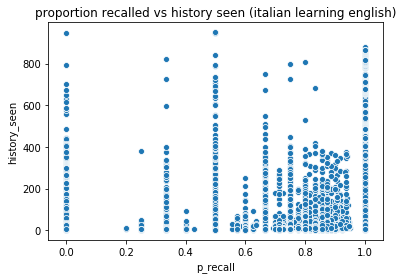

In [366]:
sns.scatterplot(y=it_learn_eng.history_seen, x= it_learn_eng.p_recall)
plt.title("proportion recalled vs history seen (italian learning english)")

Text(0.5, 1.0, 'proportion recalled vs last time seen seen (italian learning english)')

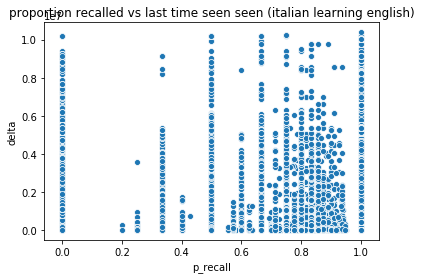

In [367]:
sns.scatterplot(y=it_learn_eng.delta, x= it_learn_eng.p_recall)
plt.title("proportion recalled vs last time seen seen (italian learning english)")

In [368]:
it_learn_eng.loc[it_learn_eng.session_seen>1]

p_recall   timestamp   delta user_id learning_language ui_language  \
136       1.000000  1362082525  610672  u:hX-p                en          it   
137       1.000000  1362082525     271  u:hX-p                en          it   
138       1.000000  1362082525   92504  u:hX-p                en          it   
139       0.750000  1362082525    5265  u:hX-p                en          it   
140       1.000000  1362082525   92504  u:hX-p                en          it   
141       1.000000  1362082525    6185  u:hX-p                en          it   
142       0.500000  1362082525   94019  u:hX-p                en          it   
771       0.750000  1362082571  338093  u:hIRn                en          it   
772       1.000000  1362082571  338093  u:hIRn                en          it   
774       0.857143  1362082571  338093  u:hIRn                en          it   
775       0.750000  1362082571  338093  u:hIRn                en          it   
776       1.000000  1362082571  338093  u:hIRn                en          it   
777       1.000000  1362082571  338093  u:hIRn                en          it   
813       1.000000  1362082570  605373  u:fwHX                en          it   
819       0.500000  1362082570  605373  u:fwHX                en          it   
821       1.000000  1362082570   17744  u:fwHX                en          it   
824       1.000000  1362082570  448519  u:fwHX                en          it   
829       1.000000  1362082570  434359  u:fwHX                en          it   
842       1.000000  1362082570   17744  u:fwHX                en          it   
851       1.000000  1362082570   17744  u:fwHX                en          it   
852       1.000000  1362082570   17744  u:fwHX                en          it   
860       1.000000  1362082570   17744  u:fwHX                en          it   
1584      0.666667  1362082606   30623  u:iL7S                en          it   
1585      1.000000  1362082606   30313  u:iL7S                en          it   
1586      1.000000  1362082606   30313  u:iL7S                en          it   
1587      1.000000  1362082606   30313  u:iL7S                en          it   
1588      1.000000  1362082606   30963  u:iL7S                en          it   
1589      0.666667  1362082606   30623  u:iL7S                en          it   
1590      0.500000  1362082606   30313  u:iL7S                en          it   
1591      0.750000  1362082606   30313  u:iL7S                en          it   
...            ...         ...     ...     ...               ...         ...   
12853241  1.000000  1363104842  429981  u:i5xp                en          it   
12853242  1.000000  1363104842  429981  u:i5xp                en          it   
12853243  1.000000  1363104842  429981  u:i5xp                en          it   
12853244  1.000000  1363104842  429981  u:i5xp                en          it   
12853245  1.000000  1363104842  429981  u:i5xp                en          it   
12853623  1.000000  1363104848     146  u:id20                en          it   
12853624  1.000000  1363104848     146  u:id20                en          it   
12853626  1.000000  1363104848     146  u:id20                en          it   
12853627  1.000000  1363104848     146  u:id20                en          it   
12853628  1.000000  1363104848     146  u:id20                en          it   
12853629  1.000000  1363104848     146  u:id20                en          it   
12853630  1.000000  1363104848     146  u:id20                en          it   
12853631  1.000000  1363104848     146  u:id20                en          it   
12853632  1.000000  1363104848     146  u:id20                en          it   
12853633  1.000000  1363104848     146  u:id20                en          it   
12853634  1.000000  1363104848     146  u:id20                en          it   
12853635  1.000000  1363104848     146  u:id20                en          it   
12853636  1.000000  1363104848     146  u:id20                en          it   
12853637  

Text(0.5, 1.0, 'proportion recalled vs history seen (italian learning english)')

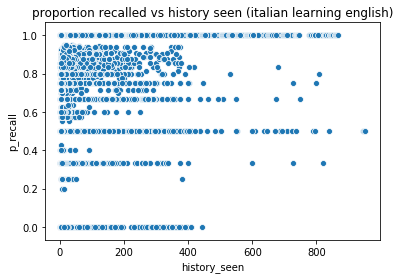

In [369]:
sns.scatterplot(x="history_seen", y= "p_recall", data = it_learn_eng.loc[it_learn_eng.session_seen>1])
plt.title("proportion recalled vs history seen (italian learning english)")

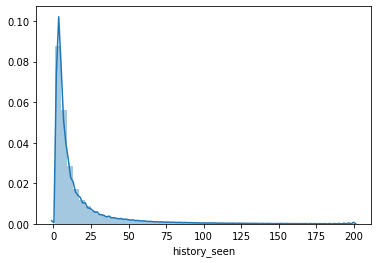

In [370]:
sns.distplot(it_learn_eng.loc[it_learn_eng.history_seen < 200].history_seen)

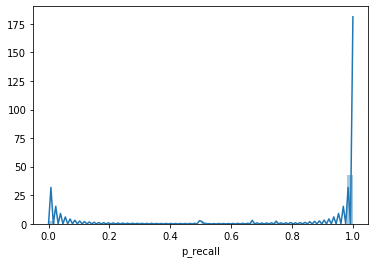

In [371]:
sns.distplot(it_learn_eng.p_recall)

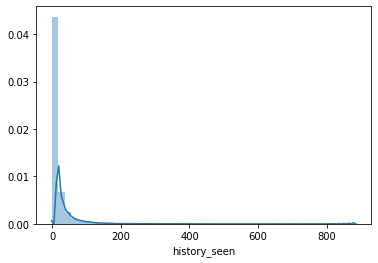

In [372]:
sns.distplot(it_learn_eng.loc[it_learn_eng.p_recall == 1].history_seen)

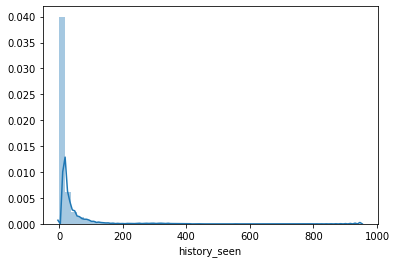

In [373]:
sns.distplot(it_learn_eng.loc[it_learn_eng.p_recall == 0].history_seen)

In [374]:
it_learn_eng.loc[it_learn_eng.user_id == 'u:hX-p']

p_recall   timestamp   delta user_id learning_language ui_language  \
136       1.000000  1362082525  610672  u:hX-p                en          it   
137       1.000000  1362082525     271  u:hX-p                en          it   
138       1.000000  1362082525   92504  u:hX-p                en          it   
139       0.750000  1362082525    5265  u:hX-p                en          it   
140       1.000000  1362082525   92504  u:hX-p                en          it   
141       1.000000  1362082525    6185  u:hX-p                en          it   
142       0.500000  1362082525   94019  u:hX-p                en          it   
3859      1.000000  1362082727     202  u:hX-p                en          it   
3860      1.000000  1362082727   93085  u:hX-p                en          it   
3861      1.000000  1362082727     473  u:hX-p                en          it   
3862      1.000000  1362082727     202  u:hX-p                en          it   
3863      1.000000  1362082727  108587  u:hX-p                en          it   
3864      1.000000  1362082727     473  u:hX-p                en          it   
3865      1.000000  1362082727  108587  u:hX-p                en          it   
3866      1.000000  1362082727  375958  u:hX-p                en          it   
3867      1.000000  1362082727  610874  u:hX-p                en          it   
3868      1.000000  1362082727    6387  u:hX-p                en          it   
3869      1.000000  1362082727  466736  u:hX-p                en          it   
3870      1.000000  1362082727     473  u:hX-p                en          it   
3871      0.000000  1362082727     202  u:hX-p                en          it   
3872      0.500000  1362082727     473  u:hX-p                en          it   
3873      1.000000  1362082727    6387  u:hX-p                en          it   
3874      1.000000  1362082727     473  u:hX-p                en          it   
3875      1.000000  1362082727  375958  u:hX-p                en          it   
3876      1.000000  1362082727    6387  u:hX-p                en          it   
3877      1.000000  1362082727     202  u:hX-p                en          it   
3878      1.000000  1362082727     202  u:hX-p                en          it   
3879      1.000000  1362082727     473  u:hX-p                en          it   
3880      1.000000  1362082727  377652  u:hX-p                en          it   
3881      0.000000  1362082727     473  u:hX-p                en          it   
...            ...         ...     ...     ...               ...         ...   
12621601  1.000000  1363085162   59550  u:hX-p                en          it   
12621602  0.666667  1363085162   59550  u:hX-p                en          it   
12621603  1.000000  1363085162   59935  u:hX-p                en          it   
12623465  1.000000  1363085365   59753  u:hX-p                en          it   
12623466  1.000000  1363085365   59930  u:hX-p                en          it   
12623467  1.000000  1363085365   78858  u:hX-p                en          it   
12623468  1.000000  1363085365     203  u:hX-p                en          it   
12623469  1.000000  1363085365   59753  u:hX-p                en          it   
12623470  1.000000  1363085365   59753  u:hX-p                en          it   
12623471  1.000000  1363085365   59930  u:hX-p                en          it   
12623472  1.000000  1363085365   59753  u:hX-p                en          it   
12623473  1.000000  1363085365   59930  u:hX-p                en          it   
12623474  1.000000  1363085365   59930  u:hX-p                en          it   
12623475  1.000000  1363085365   59753  u:hX-p                en          it   
12623476  1.000000  1363085365   59753  u:hX-p                en          it   
12623477  1.000000  1363085365   59753  u:hX-p                en          it   
12623478  1.000000  1363085365   59753  u:hX-p                en          it   
12623479  1.000000  1363085365   59753  u:hX-p                en          it   
12623480  

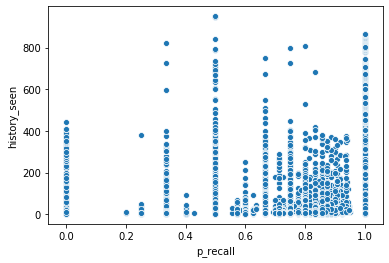

In [375]:
sns.scatterplot(x="p_recall", y = "history_seen", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen != it_learn_eng.history_seen)])

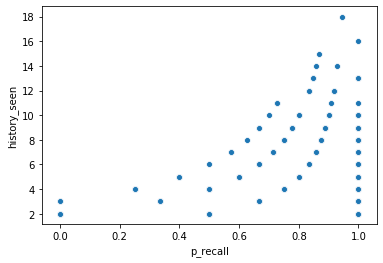

In [376]:
sns.scatterplot(x="p_recall", y = "history_seen", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen == it_learn_eng.history_seen)])

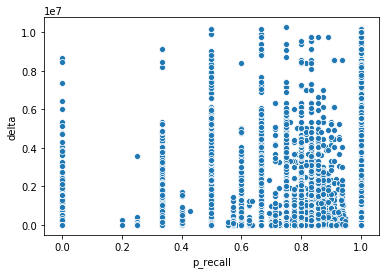

In [377]:
sns.scatterplot(x="p_recall", y = "delta", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen != it_learn_eng.history_seen)])

In [378]:
type(list(it_learn_eng.delta)[0])

int

In [379]:
type(it_learn_eng.delta[136])

numpy.int64

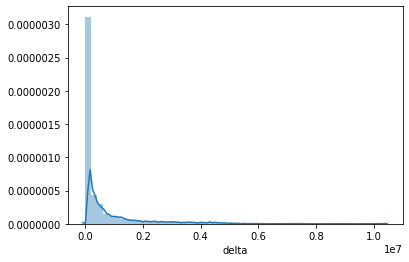

In [380]:
sns.distplot(it_learn_eng.delta)

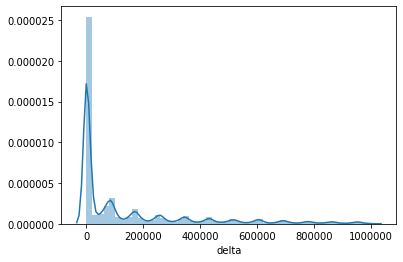

In [381]:
sns.distplot(it_learn_eng.loc[it_learn_eng.delta<1000000].delta)

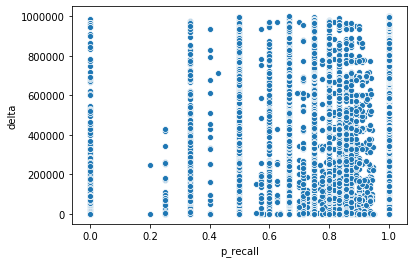

In [382]:
sns.scatterplot(x="p_recall", y = "delta", 
                data = it_learn_eng.loc[it_learn_eng.delta<1000000].loc[(it_learn_eng.loc[it_learn_eng.delta<1000000].session_seen>1)&(it_learn_eng.loc[it_learn_eng.delta<1000000].session_seen != it_learn_eng.loc[it_learn_eng.delta<1000000].history_seen)])



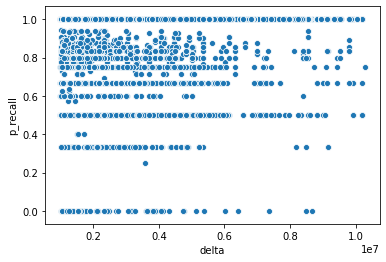

In [383]:
sns.scatterplot(x="delta", y = "p_recall", 
                data = it_learn_eng.loc[it_learn_eng.delta>1000000].loc[(it_learn_eng.loc[it_learn_eng.delta>1000000].session_seen>1)&(it_learn_eng.loc[it_learn_eng.delta>1000000].session_seen != it_learn_eng.loc[it_learn_eng.delta>1000000].history_seen)])


In [384]:
np.log(it_learn_eng.delta)

136         13.322315
137          5.602119
138         11.435007
139          8.568836
140         11.435007
141          8.729882
142         11.451252
771         12.731076
772         12.731076
773         12.731076
774         12.731076
775         12.731076
776         12.731076
777         12.731076
778         12.731076
811         14.408014
812         15.299513
813         13.313600
814         14.473943
815         12.981627
816         14.697640
817          9.783803
818          9.783803
819         13.313600
820         13.451592
821          9.783803
822         14.455924
823         14.453498
824         13.013706
825          9.783803
              ...    
12853245    12.971496
12853623     4.983607
12853624     4.983607
12853625     4.983607
12853626     4.983607
12853627     4.983607
12853628     4.983607
12853629     4.983607
12853630     4.983607
12853631     4.983607
12853632     4.983607
12853633     4.983607
12853634     4.983607
12853635     4.983607
12853636  

In [385]:
it_learn_eng = it_learn_eng.sort_values(['user_id','timestamp'], ascending=[True, True])
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  session_seen  session_correct  course_num  \
3004633               10             3                3           5   
3004634                4             2                1           5   
3004635               15             3                3           5   
3004636               13             3                3           5   
3004637               10             4                4           5   

         overall_recall  session-overall  
3004633        0.909091         0.090909  
3004634        0.500000         0.000000  
3004635        1.000000         0.000000  
3004636        0.928571         0.071429  
3004637        0.909091         0.090909

In [386]:
it_learn_eng['consec_word_delta'] = it_learn_eng['timestamp'].diff()
it_learn_eng[30:]

p_recall   timestamp    delta user_id learning_language ui_language  \
6517461   1.000000  1362596504   263084   u:HDJ                en          it   
6517462   1.000000  1362596504   263084   u:HDJ                en          it   
6517463   1.000000  1362596504   263084   u:HDJ                en          it   
6517464   0.666667  1362596504   263084   u:HDJ                en          it   
6517465   1.000000  1362596504   263084   u:HDJ                en          it   
9859974   1.000000  1362859805  2967543   u:HDJ                en          it   
9860594   0.500000  1362859853       48   u:HDJ                en          it   
9860993   1.000000  1362859878       25   u:HDJ                en          it   
9861706   1.000000  1362859924       46   u:HDJ                en          it   
10717926  1.000000  1362937395      550   u:HDJ                en          it   
10717927  1.000000  1362937395      550   u:HDJ                en          it   
10717928  0.666667  1362937395      550   u:HDJ                en          it   
10717929  1.000000  1362937395      550   u:HDJ                en          it   
10717930  1.000000  1362937395      550   u:HDJ                en          it   
10717931  1.000000  1362937395      550   u:HDJ                en          it   
10717932  1.000000  1362937395      550   u:HDJ                en          it   
10803952  1.000000  1362942369     4580   u:HDJ                en          it   
10803953  1.000000  1362942369     4580   u:HDJ                en          it   
10803954  1.000000  1362942369     4580   u:HDJ                en          it   
10803955  1.000000  1362942369     4580   u:HDJ                en          it   
10803956  1.000000  1362942369     4580   u:HDJ                en          it   
10803957  1.000000  1362942369     4580   u:HDJ                en          it   
3146216   1.000000  1362338862  4213701  u:b6hR                en          it   
3146217   1.000000  1362338862  4213701  u:b6hR                en          it   
3146218   1.000000  1362338862  8821069  u:b6hR                en          it   
3146219   1.000000  1362338862  6659477  u:b6hR                en          it   
3146220   1.000000  1362338862  4443845  u:b6hR                en          it   
3146221   1.000000  1362338862  4443845  u:b6hR                en          it   
3146222   1.000000  1362338862  8820807  u:b6hR                en          it   
3146223   1.000000  1362338862  1391962  u:b6hR                en          it   
...            ...         ...      ...     ...               ...         ...   
12833371  1.000000  1363103525      230  u:jhqu                en          it   
12833372  1.000000  1363103525     2290  u:jhqu                en          it   
12833373  1.000000  1363103525      230  u:jhqu                en          it   
12834673  1.000000  1363103612       88  u:jhqu                en          it   
12834674  1.000000  1363103612      671  u:jhqu                en          it   
12834675  1.000000  1363103612     2613  u:jhqu                en          it   
12834676  1.000000  1363103612       88  u:jhqu                en          it   
12834677  1.000000  1363103612     2032  u:jhqu                en          it   
12834678  1.000000  1363103612       88  u:jhqu                en          it   
12834679  1.000000  1363103612       88  u:jhqu                en          it   
12843643  1.000000  1363104244      390  u:jhyt                en          it   
12843644  1.000000  1363104244      715  u:jhyt                en          it   
12843645  1.000000  1363104244      715  u:jhyt                en          it   
12843646  1.000000  1363104244      390  u:jhyt                en          it   
12843647  1.000000  1363104244      715  u:jhyt                en          it   
12843648  1.000000  1363104244      715  u:jhyt                en          it   
12843649  1.000000  1363104244      390  u:jhyt                en          it   
1884294   0.000000  1362237485  2580376  

In [387]:
i= it_learn_eng.groupby('user_id')

In [388]:
it_learn_eng.groupby('lexeme_id').max()

p_recall   timestamp     delta user_id  \
lexeme_id                                                                  
000f3063358c188d171d903ec5a7855c  1.000000  1363103891   5198103  u:in_9   
0023799f4a7ed08c8dc3591efee8c049  1.000000  1363101313   5342678  u:ilcA   
0026e0c4c4ea2d3adfee4e9343e849d9  1.000000  1363101560   4966848  u:izZ8   
0032946f927663ecef94ffba0a4c487d  1.000000  1363092925   4669932  u:ik0E   
005c76e47ebbcd5c0a2c7f2e68c830ee  1.000000  1363099228   5191670  u:ilcA   
00602b2e8661dcb34a65779e484a3550  1.000000  1362994862   4067492  u:gfyS   
00654625f5f1f060483bebe64bc75b88  1.000000  1363023867    470384  u:iXIb   
006d219f6d6b7724731f28ba3451dabc  1.000000  1363037642   3219462  u:hPF7   
007752df1235753d49a00f5f08d83652  1.000000  1363099282   1496893  u:hEfD   
007e0d230d796c617ccdc9408fc36f61  1.000000  1363086168   3492640  u:ilcA   
00d9305a5d7961c44be1340454bb6fe6  1.000000  1363033849    774480  u:iXxL   
00e4f8f167ed916b627b24987bd35d8d  1.000000  1363028737   1473956  u:hA35   
00ff843e1322aa96427ac45f4ad2d7d8  1.000000  1363034383   2344876  u:hRRy   
013847d897db3a32e994b9f6484ec486  1.000000  1363094924   4645032  u:izZ8   
0148266c17053909dbfb5ad22ec40024  1.000000  1363076742   1383238  u:hPF7   
01669d9689c5cf2ec04c58a893f02ab6  1.000000  1363104897  10182741  u:jhqu   
016d83050c3607d17e48640a268eaeda  1.000000  1362848551   4208584  u:grFL   
0173df9313e7d5ed1a22b05d5db35828  1.000000  1363094547   4876070  u:gL_n   
0198a70fd08d4caa85e4dc1249dd0345  1.000000  1363093961   2063213  u:ik4g   
019e69c0c7349a49fff531b7c5fc263c  1.000000  1363101415   4454734  u:ibpp   
01a7951fd3b4cb17dacdc1a59409cb95  1.000000  1363104816   6036518  u:izZ8   
01cc48f809e020f1dcbd4d33969395d2  1.000000  1363093961   4757565  u:izZ8   
01de0f77d87418ad73eeebd839ab681a  1.000000  1362956210   4408292  u:grFL   
02526697b4a3f47139e600ad080ca610  1.000000  1363086149   2586771  u:id2j   
025ab8349ba0caa729c4f12cb47fc3be  1.000000  1363102375   4922921   u:lo6   
0277968d5d769b93c886ac98887c6501  1.000000  1363102146   5844840  u:izZ8   
02783eede3626ab13711aa92f74adff0  1.000000  1362994900   2918132  u:h9EW   
02a9a4c41c63c791d306bf6a46ce73d2  1.000000  1363087629    470454  u:i__1   
02b2afe0a18e09185079a0eef32e5fc3  1.000000  1362828666   4269678  u:hPF7   
02b3f419d705eb9c2bf3fb86606274a6  1.000000  1363040080   3424694  u:ik4g   
...                                    ...         ...       ...     ...   
fc37775015029e1d39f073eda2852b82  1.000000  1363104828   9173320  u:jeEs   
fc4c80a8b9c838274f886167c7a805a8  1.000000  1363088080    470309  u:iXIb   
fc516c7b323cecd8a4c53bcdabfdca95  1.000000  1363027265   5442279  u:gmHl   
fc90952cc1a10d03e027b34886afb122  1.000000  1363093800   2867356  u:ik4g   
fcbfcae6f712ce1a5811726b151ea365  1.000000  1363104816   8613996  u:izUn   
fd3e2fa13926af75ae7a5bde0051306a  1.000000  1363103891   5345256  u:ifhD   
fd630d86300b5bf1dfe31c29172832b0  1.000000  1363087833   4930438  u:gmHl   
fd868ce91afa319feee635bf12c24fa6  1.000000  1363103222   9919895  u:izUn   
fdc6a6b66bea64c5fee54c569d162e56  1.000000  1363068895   4727413  u:ilcA   
fe0ece574bd8e62db2afe3f5f0ca54ea  0.666667  1362653231    179378  u:iJaq   
fe1c2edd8cfeedbbbfafc42448e957c9  1.000000  1363103444   9068040  u:jgLq   
fe24e487a6e45b3887d17c7e09b69f73  1.000000  1363005649   3040709  u:ik4g   
fe39bf260c0fa64fc9aecc7b6ddbacc6  1.000000  1363085972   3552790  u:ilcA   
fe43f46c367cb02f160f1bbe06abc0a6  1.000000  1363085038   5513502  u:ilcA   
fe48bac7015550737723c9f9ca8f275c  1.000000  1362991451    355768  u:iTE0   
fe712de02998f1907de37e75e6971653  1.000000  1363085357   2354845  u:gmHl   
fe794f0c148aaa470c272ffd0a9bdc1a  1.000000  1363040981   5186682  u:ik4g   
fe7bfc92f7427156e49902177cf9da9d  1.000000  1363005649   1767415  u:iUMR   
fe99ad80f52dcc56bb9d5182cfe00e2e  1.000000  1363003362    410514  u:hB9c   
fec9bec9ebabe340cb3cf1524943ffeb  1.000000  1362985925   1914865  u:h97-   
fecde9

In [389]:
it_learn_eng.user_id.value_counts()

u:gL_n    4886
u:grFL    4072
u:id2j    3106
u:iOOh    2578
u:fPSy    2465
u:g-LD    2377
u:hX-p    2290
u:hBr1    2184
u:ik4g    2103
u:e51T    2060
u:gfyS    1979
u:g1Sg    1911
u:hYlH    1785
u:h3WL    1654
u:eY8y    1490
u:e6pB    1489
u:eW6f    1455
u:iisA    1406
u:iTE0    1361
u:gfKW    1351
u:gbGr    1333
u:i0bX    1332
u:iHPX    1325
u:gPUD    1295
u:ilcA    1239
u:gAnU    1235
u:fwI1    1231
u:gboZ    1217
u:e_F7    1215
u:hhj2    1212
          ... 
u:ipsq       1
u:h99Z       1
u:iAd0       1
u:iMu4       1
u:gmXO       1
u:hFZl       1
u:ijjR       1
u:h7KV       1
u:gdXr       1
u:gC4F       1
u:imDc       1
u:ijuB       1
u:iURT       1
u:i9FM       1
u:fwKn       1
u:ilmc       1
u:iLZW       1
u:gpxm       1
u:gkw4       1
u:i5zm       1
u:h8Pv       1
u:ioYe       1
u:iO6E       1
u:i5ND       1
u:iVzI       1
u:gg1t       1
u:hJMX       1
u:hoz9       1
u:h8eO       1
u:iI1c       1
Name: user_id, Length: 3436, dtype: int64

In [390]:
have_one_user = it_learn_eng.loc[it_learn_eng.user_id == 'u:gL_n'].loc[it_learn_eng.lexeme_id == '6d4c572af8022cb4784ce0f8898d1905']
have_one_user.head()

p_recall   timestamp  delta user_id learning_language ui_language  \
680856       0.0  1362134931  64063  u:gL_n                en          it   
683576       0.0  1362135257    327  u:gL_n                en          it   
694354       1.0  1362136735   1478  u:gL_n                en          it   
694860       0.0  1362136807     72  u:gL_n                en          it   
697212       0.5  1362137059    253  u:gL_n                en          it   

                               lexeme_id lexeme_string  history_seen  \
680856  6d4c572af8022cb4784ce0f8898d1905     to/to<pr>           206   
683576  6d4c572af8022cb4784ce0f8898d1905     to/to<pr>           207   
694354  6d4c572af8022cb4784ce0f8898d1905     to/to<pr>           208   
694860  6d4c572af8022cb4784ce0f8898d1905     to/to<pr>           209   
697212  6d4c572af8022cb4784ce0f8898d1905     to/to<pr>           210   

        history_correct  session_seen  session_correct  course_num  \
680856               80             1                0           5   
683576               80             1                0           5   
694354               80             1                1           5   
694860               81             1                0           5   
697212               81             2                1           5   

        overall_recall  session-overall  consec_word_delta  
680856        0.388350        -0.388350                0.0  
683576        0.386473        -0.386473                0.0  
694354        0.384615         0.615385                0.0  
694860        0.387560        -0.387560                0.0  
697212        0.385714         0.114286                0.0

In [391]:
it_learn_eng.loc[it_learn_eng.timestamp == 1362134933]

Empty DataFrame
Columns: [p_recall, timestamp, delta, user_id, learning_language, ui_language, lexeme_id, lexeme_string, history_seen, history_correct, session_seen, session_correct, course_num, overall_recall, session-overall, consec_word_delta]
Index: []

In [392]:
users = list(set(it_learn_eng.user_id))
len(users)

3436

In [393]:
it_learn_eng = it_learn_eng.sort_values(['user_id', 'timestamp'])

In [394]:
sorted(timestamp_list)

[1362082525,
 1362082570,
 1362082571,
 1362082606,
 1362082609,
 1362082660,
 1362082664,
 1362082666,
 1362082727,
 1362082735,
 1362082747,
 1362082762,
 1362082820,
 1362082823,
 1362082836,
 1362082868,
 1362082891,
 1362082892,
 1362082911,
 1362082949,
 1362082961,
 1362082999,
 1362083001,
 1362083010,
 1362083016,
 1362083031,
 1362083035,
 1362083047,
 1362083074,
 1362083075,
 1362083084,
 1362083105,
 1362083115,
 1362083122,
 1362083127,
 1362083150,
 1362083151,
 1362083155,
 1362083159,
 1362083173,
 1362083176,
 1362083199,
 1362083205,
 1362083209,
 1362083222,
 1362083294,
 1362083310,
 1362083327,
 1362083329,
 1362083336,
 1362083340,
 1362083346,
 1362083370,
 1362083393,
 1362083404,
 1362083424,
 1362083432,
 1362083447,
 1362083467,
 1362083491,
 1362083516,
 1362083538,
 1362083553,
 1362083611,
 1362083642,
 1362083659,
 1362083726,
 1362083742,
 1362083767,
 1362083814,
 1362083834,
 1362083835,
 1362083840,
 1362083857,
 1362083897,
 1362083922,
 1362083927,

In [404]:
timestamp_list = sorted(list(set(it_learn_eng.timestamp)))
num_list = list(range(0,len(timestamp_list)))
time_num_dict = dict(zip(timestamp_list, num_list))

session_id = [time_num_dict.get(n, n) for n in list(it_learn_eng.timestamp)]
it_learn_eng['session_id'] = session_id

/Users/KateChristensen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


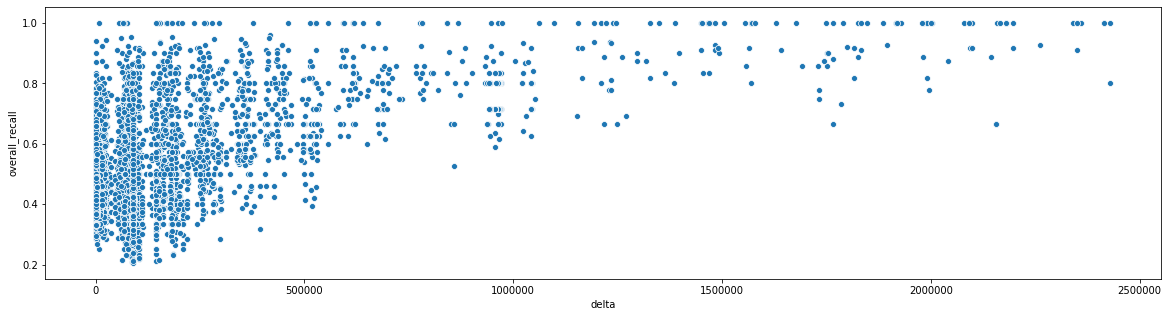

In [396]:
f,ax = plt.subplots(figsize = (20,5))
sns.scatterplot(x='delta', y = 'overall_recall', data = it_learn_eng.loc[it_learn_eng.user_id == 'u:gL_n'].loc[it_learn_eng.history_seen != it_learn_eng.session_seen])

In [397]:
df['overall_recall'] = df['history_correct']/df['history_seen']

In [398]:
df['session-overall'] = df['p_recall'] - df['overall_recall']
df.head()

p_recall   timestamp     delta user_id learning_language ui_language  \
0       1.0  1362076081  27649635    u:FO                de          en   
1       0.5  1362076081  27649635    u:FO                de          en   
2       1.0  1362076081  27649635    u:FO                de          en   
3       0.5  1362076081  27649635    u:FO                de          en   
4       1.0  1362076081  27649635    u:FO                de          en   

                          lexeme_id                     lexeme_string  \
0  76390c1350a8dac31186187e2fe1e178  lernt/lernen<vblex><pri><p3><sg>   
1  7dfd7086f3671685e2cf1c1da72796d7     die/die<det><def><f><sg><nom>   
2  35a54c25a2cda8127343f6a82e6f6b7d          mann/mann<n><m><sg><nom>   
3  0cf63ffe3dda158bc3dbd55682b355ae          frau/frau<n><f><sg><nom>   
4  84920990d78044db53c1b012f5bf9ab5    das/das<det><def><nt><sg><nom>   

   history_seen  history_correct  session_seen  session_correct  course_num  \
0             6                4             2                2           6   
1             4                4             2                1           6   
2             5                4             1                1           6   
3             6                5             2                1           6   
4             4                4             1                1           6   

   overall_recall  session-overall  
0        0.666667         0.333333  
1        1.000000        -0.500000  
2        0.800000         0.200000  
3        0.833333        -0.333333  
4        1.000000         0.000000

In [399]:
# it_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'it')]
# es_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'es')]
# pt_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'pt')]
# eng_learn_it =df.loc[(df.learning_language == 'it') & (df.ui_language == 'en')]
# eng_learn_es =df.loc[(df.learning_language == 'es') & (df.ui_language == 'en')]
# eng_learn_pt =df.loc[(df.learning_language == 'pt') & (df.ui_language == 'en')]
# eng_learn_fr =df.loc[(df.learning_language == 'fr') & (df.ui_language == 'en')]
# eng_learn_de =df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')]

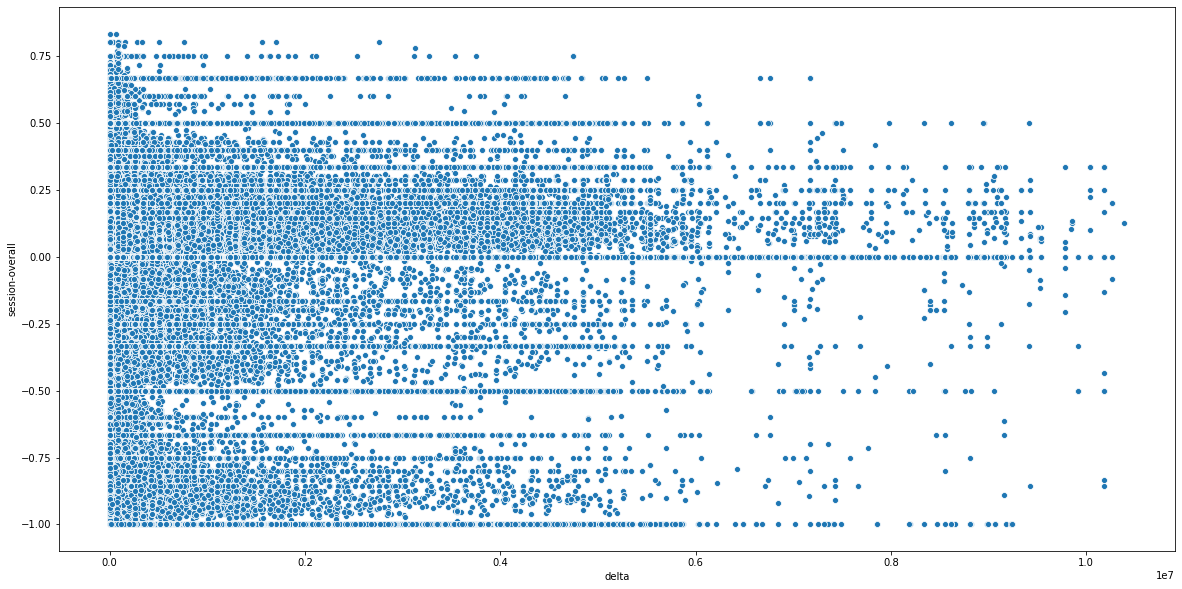

In [406]:
f,ax = plt.subplots(figsize = (20,10))

sns.scatterplot(x='delta', y = 'session-overall', data = it_learn_eng)

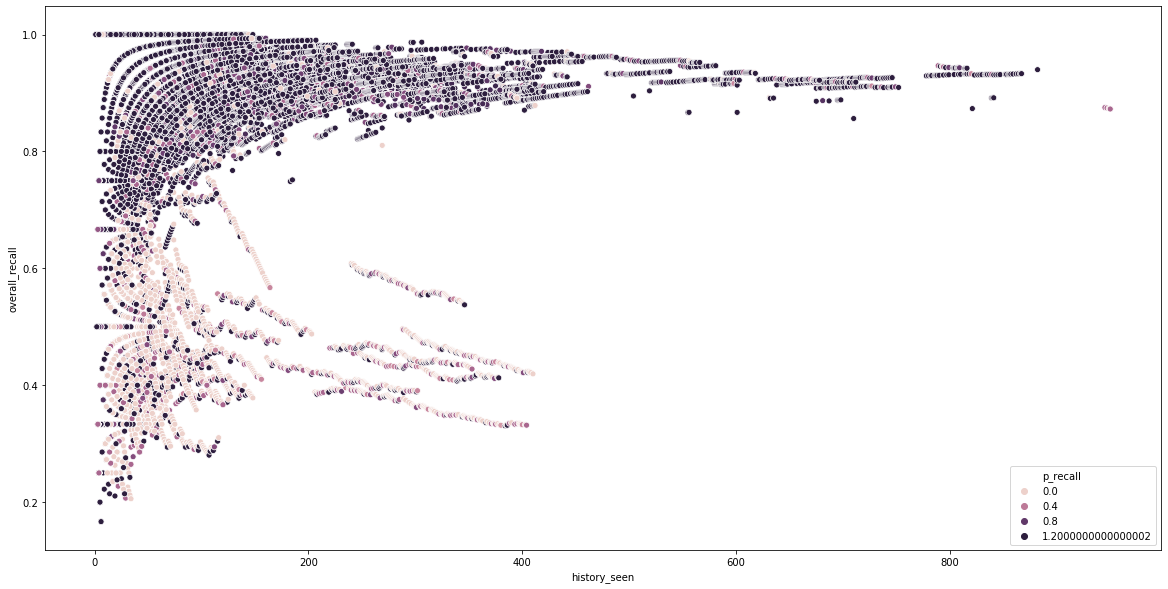

In [407]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y= it_learn_eng.overall_recall, x = it_learn_eng.history_seen,hue = it_learn_eng.p_recall)

In [408]:
it_learn_eng.sort_values(['user_id', 'timestamp'])

p_recall   timestamp    delta user_id learning_language ui_language  \
3004633   1.000000  1362330934   252471   u:HDJ                en          it   
3004634   0.500000  1362330934   252471   u:HDJ                en          it   
3004635   1.000000  1362330934   252471   u:HDJ                en          it   
3004636   1.000000  1362330934   252471   u:HDJ                en          it   
3004637   1.000000  1362330934   252471   u:HDJ                en          it   
3004638   1.000000  1362330934   252471   u:HDJ                en          it   
3004639   1.000000  1362330934   252471   u:HDJ                en          it   
4088426   1.000000  1362417834    85471   u:HDJ                en          it   
4088427   1.000000  1362417834    85471   u:HDJ                en          it   
4088428   1.000000  1362417834    85471   u:HDJ                en          it   
4088429   0.500000  1362417834    85471   u:HDJ                en          it   
4088430   1.000000  1362417834    85471   u:HDJ                en          it   
4088431   0.666667  1362417834    85471   u:HDJ                en          it   
4088432   1.000000  1362417834    85471   u:HDJ                en          it   
4115727   1.000000  1362419471     1637   u:HDJ                en          it   
4115728   0.666667  1362419471     1637   u:HDJ                en          it   
4115729   1.000000  1362419471     1637   u:HDJ                en          it   
4115730   0.666667  1362419471     1637   u:HDJ                en          it   
4115731   1.000000  1362419471     1637   u:HDJ                en          it   
4115732   1.000000  1362419471     1637   u:HDJ                en          it   
4115733   1.000000  1362419471     1637   u:HDJ                en          it   
6497899   1.000000  1362595356   262402   u:HDJ                en          it   
6497900   1.000000  1362595356   262402   u:HDJ                en          it   
6497901   1.000000  1362595356   262402   u:HDJ                en          it   
6497902   1.000000  1362595356   262402   u:HDJ                en          it   
6497903   1.000000  1362595356   262402   u:HDJ                en          it   
6497904   1.000000  1362595356   262402   u:HDJ                en          it   
6497905   1.000000  1362595356   262402   u:HDJ                en          it   
6517459   0.666667  1362596504   263084   u:HDJ                en          it   
6517460   0.500000  1362596504   263084   u:HDJ                en          it   
...            ...         ...      ...     ...               ...         ...   
12833371  1.000000  1363103525      230  u:jhqu                en          it   
12833372  1.000000  1363103525     2290  u:jhqu                en          it   
12833373  1.000000  1363103525      230  u:jhqu                en          it   
12834673  1.000000  1363103612       88  u:jhqu                en          it   
12834674  1.000000  1363103612      671  u:jhqu                en          it   
12834675  1.000000  1363103612     2613  u:jhqu                en          it   
12834676  1.000000  1363103612       88  u:jhqu                en          it   
12834677  1.000000  1363103612     2032  u:jhqu                en          it   
12834678  1.000000  1363103612       88  u:jhqu                en          it   
12834679  1.000000  1363103612       88  u:jhqu                en          it   
12843643  1.000000  1363104244      390  u:jhyt                en          it   
12843644  1.000000  1363104244      715  u:jhyt                en          it   
12843645  1.000000  1363104244      715  u:jhyt                en          it   
12843646  1.000000  1363104244      390  u:jhyt                en          it   
12843647  1.000000  1363104244      715  u:jhyt                en          it   
12843648  1.000000  1363104244      715  u:jhyt                en          it   
12843649  1.000000  1363104244      390  u:jhyt                en          it   
1884294   0.000000  1362237485  2580376  

In [409]:
session_user_dict = dict(zip(it_learn_eng.session_id, it_learn_eng.user_id))
final_dict = {}
for k,v in session_user_dict.items():
    if v not in final_dict:
        final_dict.update({v:[k]})
    else:
        final_dict[v].append(k)

each_user_sessions = final_dict
each_user_sessions

{'u:hX-p': [0,
  8,
  18,
  760,
  773,
  781,
  792,
  808,
  817,
  841,
  850,
  855,
  875,
  889,
  906,
  929,
  940,
  949,
  952,
  970,
  1192,
  1208,
  1223,
  1231,
  1239,
  1275,
  1280,
  1299,
  1304,
  3775,
  3791,
  5183,
  5191,
  5196,
  5199,
  5203,
  5210,
  5215,
  6199,
  6208,
  6222,
  6224,
  6226,
  6233,
  6241,
  7595,
  7603,
  7617,
  7622,
  7633,
  7643,
  7646,
  7652,
  7658,
  7664,
  8156,
  8162,
  8251,
  8258,
  8264,
  8281,
  8299,
  8565,
  8758,
  8764,
  8773,
  9792,
  9801,
  10867,
  10870,
  10883,
  10896,
  10918,
  10936,
  10948,
  10961,
  10969,
  10980,
  10993,
  11004,
  12214,
  12578,
  12619,
  12632,
  12642,
  12663,
  12669,
  13475,
  13511,
  13536,
  13545,
  13555,
  13566,
  13575,
  13585,
  15292,
  15308,
  16280,
  16291,
  16535,
  16541,
  16544,
  16552,
  16556,
  16566,
  16570,
  16585,
  19738,
  19746,
  19750,
  19764,
  19768,
  19958,
  19960,
  19968,
  19989,
  21056,
  21085,
  21103,
  21135,
  2

In [410]:
v_list_each_user_sessions = list(each_user_sessions.values())
num_of_sessions_list_of_dicts = [dict(enumerate(val)) for val in v_list_each_user_sessions]
num_session = {}
for item in num_of_sessions_list_of_dicts:
    num_session.update({y:x for x,y in item.items()})

In [411]:
num_session

{0: 0,
 8: 1,
 18: 2,
 760: 3,
 773: 4,
 781: 5,
 792: 6,
 808: 7,
 817: 8,
 841: 9,
 850: 10,
 855: 11,
 875: 12,
 889: 13,
 906: 14,
 929: 15,
 940: 16,
 949: 17,
 952: 18,
 970: 19,
 1192: 20,
 1208: 21,
 1223: 22,
 1231: 23,
 1239: 24,
 1275: 25,
 1280: 26,
 1299: 27,
 1304: 28,
 3775: 29,
 3791: 30,
 5183: 31,
 5191: 32,
 5196: 33,
 5199: 34,
 5203: 35,
 5210: 36,
 5215: 37,
 6199: 38,
 6208: 39,
 6222: 40,
 6224: 41,
 6226: 42,
 6233: 43,
 6241: 44,
 7595: 45,
 7603: 46,
 7617: 47,
 7622: 48,
 7633: 49,
 7643: 50,
 7646: 51,
 7652: 52,
 7658: 53,
 7664: 54,
 8156: 55,
 8162: 56,
 8251: 57,
 8258: 58,
 8264: 59,
 8281: 60,
 8299: 61,
 8565: 62,
 8758: 63,
 8764: 64,
 8773: 65,
 9792: 66,
 9801: 67,
 10867: 68,
 10870: 69,
 10883: 70,
 10896: 71,
 10918: 72,
 10936: 73,
 10948: 74,
 10961: 75,
 10969: 76,
 10980: 77,
 10993: 78,
 11004: 79,
 12214: 80,
 12578: 81,
 12619: 82,
 12632: 83,
 12642: 84,
 12663: 85,
 12669: 86,
 13475: 87,
 13511: 88,
 13536: 89,
 13545: 90,
 13555: 91,

In [412]:
it_learn_eng['session_comp'] = it_learn_eng['session_id'].map(num_session)

/Users/KateChristensen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [413]:
it_learn_eng.tail(30)

p_recall   timestamp   delta user_id learning_language ui_language  \
12853245  1.000000  1363104842  429981  u:i5xp                en          it   
12853623  1.000000  1363104848     146  u:id20                en          it   
12853624  1.000000  1363104848     146  u:id20                en          it   
12853625  1.000000  1363104848     146  u:id20                en          it   
12853626  1.000000  1363104848     146  u:id20                en          it   
12853627  1.000000  1363104848     146  u:id20                en          it   
12853628  1.000000  1363104848     146  u:id20                en          it   
12853629  1.000000  1363104848     146  u:id20                en          it   
12853630  1.000000  1363104848     146  u:id20                en          it   
12853631  1.000000  1363104848     146  u:id20                en          it   
12853632  1.000000  1363104848     146  u:id20                en          it   
12853633  1.000000  1363104848     146  u:id20                en          it   
12853634  1.000000  1363104848     146  u:id20                en          it   
12853635  1.000000  1363104848     146  u:id20                en          it   
12853636  1.000000  1363104848     146  u:id20                en          it   
12853637  1.000000  1363104848     146  u:id20                en          it   
12853638  1.000000  1363104848     146  u:id20                en          it   
12853639  1.000000  1363104848     146  u:id20                en          it   
12853640  1.000000  1363104848     146  u:id20                en          it   
12853641  1.000000  1363104848     146  u:id20                en          it   
12853682  1.000000  1363104857    5864  u:hBr1                en          it   
12853683  0.000000  1363104857   15954  u:hBr1                en          it   
12853684  1.000000  1363104857    5864  u:hBr1                en          it   
12854219  0.750000  1363104897     368  u:i5D8                en          it   
12854220  1.000000  1363104897     368  u:i5D8                en          it   
12854221  0.800000  1363104897     368  u:i5D8                en          it   
12854222  0.800000  1363104897     368  u:i5D8                en          it   
12854223  1.000000  1363104897     368  u:i5D8                en          it   
12854224  0.600000  1363104897     368  u:i5D8                en          it   
12854225  0.666667  1363104897     368  u:i5D8                en          it   

                                 lexeme_id                     lexeme_string  \
12853245  0bc5f4a19bfb7338b2b821e211ee2dde             its/its<det><pos><sp>   
12853623  0d9244f805fd55af1281a1bcb1a2cba6                   and/and<cnjcoo>   
12853624  01669d9689c5cf2ec04c58a893f02ab6  drinks/drink<vblex><pri><p3><sg>   
12853625  cdfecc9247566d40bb964a218c54c783          drink/drink<vblex><pres>   
12853626  5e29d77697d23070a1fb92eb6c90e9b6                bread/bread<n><sg>   
12853627  80765ae2a08ba6812a4ab9df607b97d2         am/be<vbser><pri><p1><sg>   
12853628  375662ec82debfdebd8215b147848cc7                woman/woman<n><sg>   
12853629  678bfa5d0ccd050c12395a792abaff12   i/prpers<prn><subj><p1><mf><sg>   
12853630  97e922f780d628eac638bea7a02bf496         is/be<vbser><pri><p3><sg>   
12853631  142ad0f32d08728de0f9955df5b83f32                an/a<det><ind><sg>   
12853632  65e39bd07057893f74d8db10b367f7aa  she/prpers<prn><subj><p3><f><sg>   
12853633  d5efc552aaea3109eb5388aa1ec8673d             the/the<det><def><sp>   
12853634  aa94db3b587c7027e8505c25f6fc8ed9                apple/apple<n><sg>   
12853635  b974624f112084b39586380fe4aaf32a                    man/man<n><sg>   
12853636  0b92ea6f088f642e9aaa8c2acc7d7b0a                    boy/boy<n><sg>   
12853637  a826c47947d68549fa81e19cafa57ba0              eat/eat<vblex><pres>   
12853638  827a8ecb89f9b59ac5c29b620a5d3ed6                 a/a<det><ind><sg>   
12853639  547bb1812414cec172b0afef5ca93fce                  girl/girl<n><sg>   
12853640 

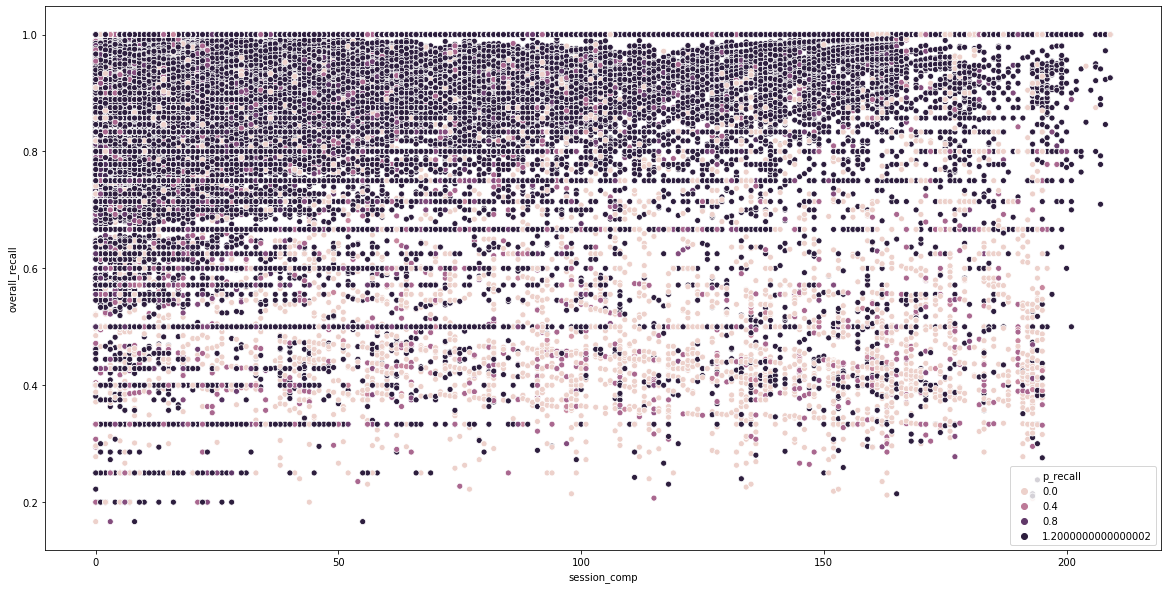

In [414]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= it_learn_eng.session_comp, y = it_learn_eng.overall_recall, hue = it_learn_eng.p_recall)

In [415]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'session_comp', y = 'overall_recall', hue = 'p_recall', size = 'delta', sizes=(40, 400), alpha=.5, data = it_learn_eng)



Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [416]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'delta', y = 'overall_recall', hue = 'p_recall', data = it_learn_eng)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x118dab6a8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [417]:
conditions = [
    it_learn_eng['p_recall']>it_learn_eng['overall_recall'], 
    it_learn_eng['p_recall']==it_learn_eng['overall_recall'], 
    it_learn_eng['p_recall']<it_learn_eng['overall_recall']]
choices = ['improve', 'same', 'worsen']
it_learn_eng['improvement'] = np.select(conditions, choices)

/Users/KateChristensen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [418]:
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  session_seen  session_correct  course_num  \
136            36               36             3                3           5   
137            76               67             4                4           5   
138            61               54             6                6           5   
139            42               39             4                3           5   
140            28               22             2                2           5   

     overall_recall  session-overall  session_id  session_comp improvement  
136        1.000000         0.000000           0             0        same  
137        0.881579         0.118421           0             0     improve  
138        0.885246         0.114754           0             0     improve  
139        0.928571        -0.178571           0             0      worsen  
140        0.785714         0.214286           0             0     improve

In [419]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'session_comp', y = 'overall_recall', hue = 'improvement', 
                alpha=.7, data = it_learn_eng, palette="husl")



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x118dab6a8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [420]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'history_seen', y = 'overall_recall', hue = 'improvement', 
                alpha=.7, data = it_learn_eng, palette="husl")

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

p_recall   timestamp    delta user_id learning_language ui_language  \
136       1.000000  1362082525   610672  u:hX-p                en          it   
137       1.000000  1362082525      271  u:hX-p                en          it   
138       1.000000  1362082525    92504  u:hX-p                en          it   
139       0.750000  1362082525     5265  u:hX-p                en          it   
140       1.000000  1362082525    92504  u:hX-p                en          it   
141       1.000000  1362082525     6185  u:hX-p                en          it   
142       0.500000  1362082525    94019  u:hX-p                en          it   
771       0.750000  1362082571   338093  u:hIRn                en          it   
772       1.000000  1362082571   338093  u:hIRn                en          it   
773       1.000000  1362082571   338093  u:hIRn                en          it   
774       0.857143  1362082571   338093  u:hIRn                en          it   
775       0.750000  1362082571   338093  u:hIRn                en          it   
776       1.000000  1362082571   338093  u:hIRn                en          it   
777       1.000000  1362082571   338093  u:hIRn                en          it   
778       1.000000  1362082571   338093  u:hIRn                en          it   
811       1.000000  1362082570  1808510  u:fwHX                en          it   
812       1.000000  1362082570  4410565  u:fwHX                en          it   
813       1.000000  1362082570   605373  u:fwHX                en          it   
814       1.000000  1362082570  1931762  u:fwHX                en          it   
815       0.000000  1362082570   434359  u:fwHX                en          it   
816       1.000000  1362082570  2416040  u:fwHX                en          it   
817       1.000000  1362082570    17744  u:fwHX                en          it   
818       1.000000  1362082570    17744  u:fwHX                en          it   
819       0.500000  1362082570   605373  u:fwHX                en          it   
820       1.000000  1362082570   694948  u:fwHX                en          it   
821       1.000000  1362082570    17744  u:fwHX                en          it   
822       1.000000  1362082570  1897265  u:fwHX                en          it   
823       1.000000  1362082570  1892667  u:fwHX                en          it   
824       1.000000  1362082570   448519  u:fwHX                en          it   
825       1.000000  1362082570    17744  u:fwHX                en          it   
...            ...         ...      ...     ...               ...         ...   
12853245  1.000000  1363104842   429981  u:i5xp                en          it   
12853623  1.000000  1363104848      146  u:id20                en          it   
12853624  1.000000  1363104848      146  u:id20                en          it   
12853625  1.000000  1363104848      146  u:id20                en          it   
12853626  1.000000  1363104848      146  u:id20                en          it   
12853627  1.000000  1363104848      146  u:id20                en          it   
12853628  1.000000  1363104848      146  u:id20                en          it   
12853629  1.000000  1363104848      146  u:id20                en          it   
12853630  1.000000  1363104848      146  u:id20                en          it   
12853631  1.000000  1363104848      146  u:id20                en          it   
12853632  1.000000  1363104848      146  u:id20                en          it   
12853633  1.000000  1363104848      146  u:id20                en          it   
12853634  1.000000  1363104848      146  u:id20                en          it   
12853635  1.000000  1363104848      146  u:id20                en          it   
12853636  1.000000  1363104848      146  u:id20                en          it   
12853637  1.000000  1363104848      146  u:id20                en          it   
12853638  1.000000  1363104848      146  u:id20                en          it   
12853639  1.000000  1363104848      146  

In [422]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'delta', y = 'overall_recall', hue = 'improvement', 
                alpha=.7, data = it_learn_eng, palette="husl")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x118dab6a8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [423]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'p_recall', y = 'overall_recall', hue = 'improvement', 
                alpha=.7, data = it_learn_eng, palette="husl")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x118dab6a8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [424]:
it_learn_eng.shape

(424152, 18)

In [425]:
from pandas import get_dummies

In [426]:
pd.get_dummies(it_learn_eng.improvement)

improve  same  worsen
136             0     1       0
137             1     0       0
138             1     0       0
139             0     0       1
140             1     0       0
141             1     0       0
142             0     0       1
771             0     0       1
772             1     0       0
773             0     1       0
774             0     0       1
775             1     0       0
776             0     1       0
777             0     1       0
778             0     1       0
811             0     1       0
812             0     1       0
813             1     0       0
814             0     1       0
815             0     0       1
816             1     0       0
817             1     0       0
818             1     0       0
819             0     0       1
820             1     0       0
821             1     0       0
822             0     1       0
823             0     1       0
824             0     1       0
825             1     0       0
...           ...   ...     ...
12853245        0     1       0
12853623        1     0       0
12853624        1     0       0
12853625        1     0       0
12853626        1     0       0
12853627        1     0       0
12853628        0     1       0
12853629        1     0       0
12853630        1     0       0
12853631        1     0       0
12853632        1     0       0
12853633        1     0       0
12853634        1     0       0
12853635        0     1       0
12853636        1     0       0
12853637        1     0       0
12853638        1     0       0
12853639        1     0       0
12853640        1     0       0
12853641        1     0       0
12853682        0     1       0
12853683        0     0       1
12853684        1     0       0
12854219        0     1       0
12854220        1     0       0
12854221        1     0       0
12854222        0     0       1
12854223        0     1       0
12854224        0     0       1
12854225        1     0       0

[424152 rows x 3 columns]

In [427]:
it_learn_eng = pd.concat([it_learn_eng, pd.get_dummies(it_learn_eng.improvement)], axis=1)

In [ ]:
it_learn_eng = it_learn_eng.drop(it_learn_eng[(it_learn_eng.history_seen > 200) & (it_learn_eng.overall_recall < 0.6)].index)

In [448]:
it_learn_eng_means = it_learn_eng.groupby(['lexeme_id', 'session_comp']).mean()
it_learn_eng_means.head()


p_recall     timestamp  \
lexeme_id                        session_comp                           
000f3063358c188d171d903ec5a7855c 0             0.800000  1.362488e+09   
                                 1             1.000000  1.362420e+09   
                                 2             1.000000  1.362503e+09   
                                 3             0.833333  1.362294e+09   
                                 4             1.000000  1.362651e+09   

                                                   delta  history_seen  \
lexeme_id                        session_comp                            
000f3063358c188d171d903ec5a7855c 0             1499914.9      3.700000   
                                 1              120292.0      3.400000   
                                 2              273500.5      4.500000   
                                 3              530114.0      5.333333   
                                 4               97803.0      2.750000   

                                               history_correct  session_seen  \
lexeme_id                        session_comp                                  
000f3063358c188d171d903ec5a7855c 0                    3.400000      1.000000   
                                 1                    2.800000      1.200000   
                                 2                    4.000000      1.000000   
                                 3                    5.333333      1.333333   
                                 4                    2.500000      1.250000   

                                               session_correct  course_num  \
lexeme_id                        session_comp                                
000f3063358c188d171d903ec5a7855c 0                        0.80         5.0   
                                 1                        1.20         5.0   
                                 2                        1.00         5.0   
                                 3                        1.00         5.0   
                                 4                        1.25         5.0   

                                               overall_recall  \
lexeme_id                        session_comp                   
000f3063358c188d171d903ec5a7855c 0                   0.945909   
                                 1                   0.866667   
                                 2                   0.928571   
                                 3                   1.000000   
                                 4                   0.916667   

                                               session-overall    session_id  \
lexeme_id                        session_comp                                  
000f3063358c188d171d903ec5a7855c 0                   -0.145909  10590.400000   
                                 1                    0.133333   8911.200000   
                                 2                    0.071429  11346.500000   
                                 3                   -0.166667   4904.666667   
                                 4                    0.083333  15138.500000   

                                               improve      same    worsen  
lexeme_id                        session_comp                               
000f3063358c188d171d903ec5a7855c 0                0.10  0.700000  0.200000  
                                 1                0.40  0.600000  0.000000  
                                 2                0.25  0.750000  0.000000  
                                 3                0.00  0.666667  0.333333  
                                 4                0.25  0.750000  0.000000

In [449]:
it_learn_eng_means.reset_index(inplace=True)

In [521]:
it_learn_eng_means

lexeme_id  session_comp  p_recall         delta  \
0      000f3063358c188d171d903ec5a7855c             0  0.800000  1.499915e+06   
1      000f3063358c188d171d903ec5a7855c             1  1.000000  1.202920e+05   
2      000f3063358c188d171d903ec5a7855c             2  1.000000  2.735005e+05   
3      000f3063358c188d171d903ec5a7855c             3  0.833333  5.301140e+05   
4      000f3063358c188d171d903ec5a7855c             4  1.000000  9.780300e+04   
5      000f3063358c188d171d903ec5a7855c             5  1.000000  4.834733e+05   
6      000f3063358c188d171d903ec5a7855c             6  1.000000  1.075963e+05   
7      000f3063358c188d171d903ec5a7855c             7  1.000000  3.718188e+05   
8      000f3063358c188d171d903ec5a7855c             8  1.000000  1.438098e+05   
9      000f3063358c188d171d903ec5a7855c             9  1.000000  6.583608e+05   
10     000f3063358c188d171d903ec5a7855c            10  0.958333  9.622817e+05   
11     000f3063358c188d171d903ec5a7855c            11  1.000000  1.683534e+06   
12     000f3063358c188d171d903ec5a7855c            13  0.000000  9.435900e+05   
13     000f3063358c188d171d903ec5a7855c            14  1.000000  8.604365e+05   
14     000f3063358c188d171d903ec5a7855c            15  0.687500  1.521082e+05   
15     000f3063358c188d171d903ec5a7855c            16  1.000000  1.588733e+04   
16     000f3063358c188d171d903ec5a7855c            17  1.000000  1.379000e+03   
17     000f3063358c188d171d903ec5a7855c            18  1.000000  1.108174e+06   
18     000f3063358c188d171d903ec5a7855c            19  1.000000  1.670540e+06   
19     000f3063358c188d171d903ec5a7855c            20  1.000000  1.187630e+05   
20     000f3063358c188d171d903ec5a7855c            21  1.000000  2.180000e+03   
21     000f3063358c188d171d903ec5a7855c            22  1.000000  1.062670e+05   
22     000f3063358c188d171d903ec5a7855c            23  1.000000  2.935814e+05   
23     000f3063358c188d171d903ec5a7855c            25  1.000000  2.169753e+06   
24     000f3063358c188d171d903ec5a7855c            28  0.416667  1.306610e+06   
25     000f3063358c188d171d903ec5a7855c            29  0.975000  9.030000e+02   
26     000f3063358c188d171d903ec5a7855c            30  1.000000  2.621651e+06   
27     000f3063358c188d171d903ec5a7855c            33  1.000000  8.105800e+04   
28     000f3063358c188d171d903ec5a7855c            36  1.000000  1.745790e+05   
29     000f3063358c188d171d903ec5a7855c            39  1.000000  2.483190e+05   
...                                 ...           ...       ...           ...   
70115  ffcfde4bf4fc1c5f19d9de9cc2bd531c            60  1.000000  1.812647e+06   
70116  ffcfde4bf4fc1c5f19d9de9cc2bd531c            62  1.000000  1.268900e+04   
70117  ffcfde4bf4fc1c5f19d9de9cc2bd531c            63  0.000000  1.794000e+03   
70118  ffcfde4bf4fc1c5f19d9de9cc2bd531c            64  1.000000  2.654590e+05   
70119  ffcfde4bf4fc1c5f19d9de9cc2bd531c            65  1.000000  9.924500e+04   
70120  ffcfde4bf4fc1c5f19d9de9cc2bd531c            66  1.000000  6.139650e+05   
70121  ffcfde4bf4fc1c5f19d9de9cc2bd531c            67  0.000000  9.551600e+04   
70122  ffcfde4bf4fc1c5f19d9de9cc2bd531c            71  1.000000  2.927535e+05   
70123  ffcfde4bf4fc1c5f19d9de9cc2bd531c            76  1.000000  2.373000e+04   
70124  ffcfde4bf4fc1c5f19d9de9cc2bd531c            77  1.000000  4.390000e+02   
70125  ffcfde4bf4fc1c5f19d9de9cc2bd531c            79  1.000000  3.700480e+05   
70126  ffcfde4bf4fc1c5f19d9de9cc2bd531c            83  1.000000  1.676880e+05   
70127  ffcfde4bf4fc1c5f19d9de9cc2bd531c            85  1.000000  9.311150e+04   
70128  ffcfde4bf4fc1c5f19d9de9cc2bd531c            86  1.000000  2.987140e+05   
70129  ffcfde4bf4fc1c5f19d9de9cc2bd531c            91  1.000000  5.990000e+04   
70130  ffcfde4bf4fc1c5f19d9de9cc2bd531c            93  1.000000  1.350000e+02   
70131  ffcfde4bf4fc1c5f19d9de9cc2bd531c            96  0.000000  2.036000e+03   
70132  ffcfde4bf4fc1c5f19d9de9cc2bd531c           108  0.0000

In [451]:
it_learn_eng_means = it_learn_eng_means[it_learn_eng_means['history_seen']<500]

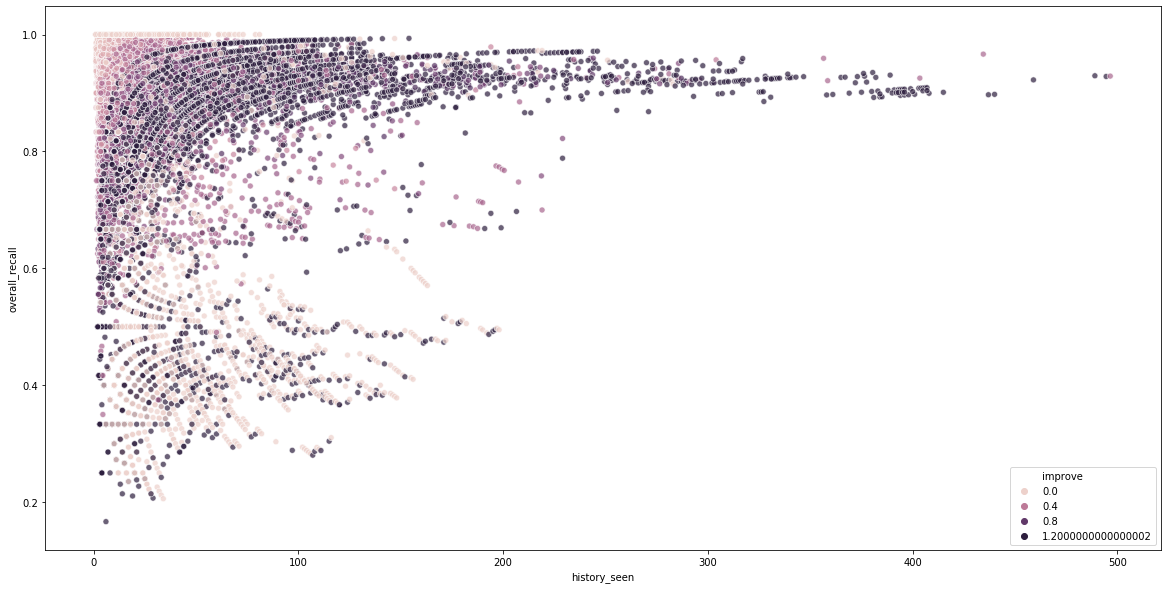

In [452]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'history_seen', y = 'overall_recall', hue = 'improve', 
                alpha=.7, data = it_learn_eng_means)

In [453]:
it_learn_eng_means.drop(columns = ['course_num'], inplace=True)

In [454]:
it_learn_eng_means.corr()

session_comp  p_recall  timestamp     delta  history_seen  \
session_comp         1.000000 -0.136107   0.389030 -0.177965      0.346561   
p_recall            -0.136107  1.000000   0.016488 -0.001497     -0.055567   
timestamp            0.389030  0.016488   1.000000 -0.048277      0.107045   
delta               -0.177965 -0.001497  -0.048277  1.000000     -0.147356   
history_seen         0.346561 -0.055567   0.107045 -0.147356      1.000000   
history_correct      0.313073  0.004316   0.102862 -0.138857      0.983764   
session_seen         0.057962  0.064729   0.058972  0.010931      0.052187   
session_correct      0.007147  0.403879   0.059818  0.007793      0.031171   
overall_recall      -0.185154  0.346223   0.006590  0.074406     -0.111474   
session-overall     -0.036521  0.845519   0.013439 -0.043908      0.005512   
session_id           0.381942  0.016141   0.999088 -0.043526      0.104724   
improve              0.202651  0.249893   0.050172 -0.115532      0.333045   
same                -0.269447  0.388656  -0.041375  0.099033     -0.347044   
worsen               0.113345 -0.916177  -0.009046  0.015325      0.045990   

                 history_correct  session_seen  session_correct  \
session_comp            0.313073      0.057962         0.007147   
p_recall                0.004316      0.064729         0.403879   
timestamp               0.102862      0.058972         0.059818   
delta                  -0.138857      0.010931         0.007793   
history_seen            0.983764      0.052187         0.031171   
history_correct         1.000000      0.063789         0.063333   
session_seen            0.063789      1.000000         0.924971   
session_correct         0.063333      0.924971         1.000000   
overall_recall         -0.015209     -0.007195         0.120994   
session-overall         0.013156      0.071579         0.352209   
session_id              0.100524      0.059124         0.059814   
improve                 0.333141      0.076058         0.164512   
same                   -0.315704     -0.115218         0.044480   
worsen                 -0.000047      0.063178        -0.293527   

                 overall_recall  session-overall  session_id   improve  \
session_comp          -0.185154        -0.036521    0.381942  0.202651   
p_recall               0.346223         0.845519    0.016141  0.249893   
timestamp              0.006590         0.013439    0.999088  0.050172   
delta                  0.074406        -0.043908   -0.043526 -0.115532   
history_seen          -0.111474         0.005512    0.104724  0.333045   
history_correct       -0.015209         0.013156    0.100524  0.333141   
session_seen          -0.007195         0.071579    0.059124  0.076058   
session_correct        0.120994         0.352209    0.059814  0.164512   
overall_recall         1.000000        -0.208185    0.007186 -0.470307   
session-overall       -0.208185         1.000000    0.012739  0.528205   
session_id             0.007186         0.012739    1.000000  0.047528   
improve               -0.470307         0.528205    0.047528  1.000000   
same                   0.622811         0.050730   -0.039170 -0.755539   
worsen                -0.259366        -0.807561   -0.008606 -0.281546   

                     same    worsen  
session_comp    -0.269447  0.113345  
p_recall         0.388656 -0.916177  
timestamp       -0.041375 -0.009046  
delta            0.099033  0.015325  
history_seen    -0.347044  0.045990  
history_correct -0.315704 -0.000047  
session_seen    -0.115218  0.063178  
session_correct  0.044480 -0.293527  
overall_recall   0.622811 -0.259366  
session-overall  0.050730 -0.807561  
session_id      -0.039170 -0.008606  
improve         -0.755539 -0.281546  
same             1.000000 -0.415885  
worsen          -0.415885  1.000000

In [455]:
it_learn_eng_means.drop(columns=['timestamp', 'session_id'], inplace= True)

In [456]:
it_learn_eng_means.drop(columns=['worsen'], inplace= True)

In [457]:
it_learn_eng_means.drop(columns = ['history_correct', 'session_correct'], inplace= True)

In [464]:
it_learn_eng_means.drop(columns = ['session-overall'], inplace= True)

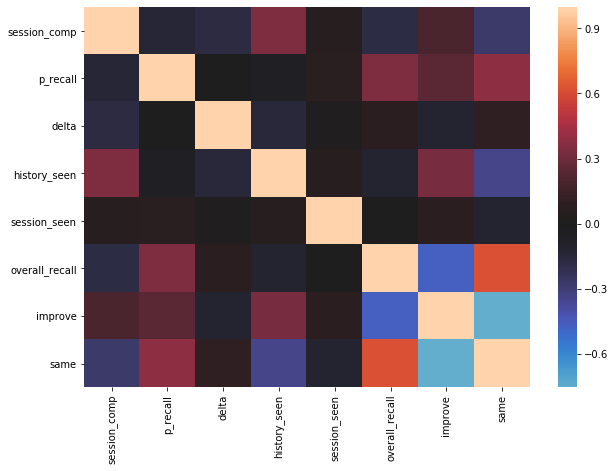

In [465]:
f,ax = plt.subplots(figsize = (10,7))
sns.heatmap(it_learn_eng_means.corr(), center = 0)

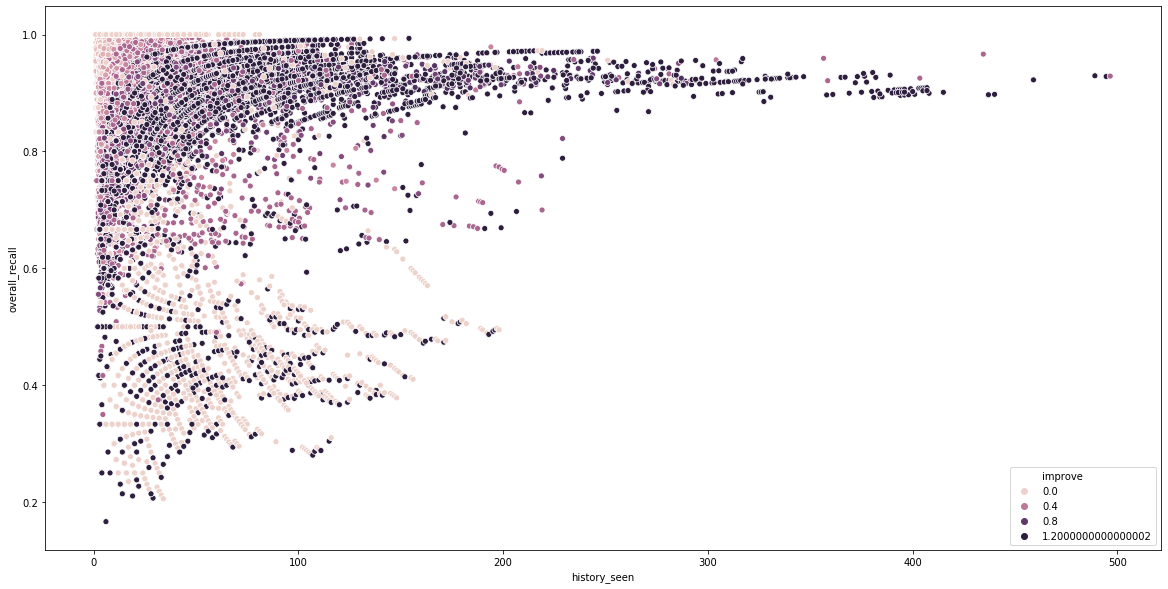

In [466]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = it_learn_eng_means.history_seen, 
                y = it_learn_eng_means.overall_recall, 
                hue = it_learn_eng_means.improve)

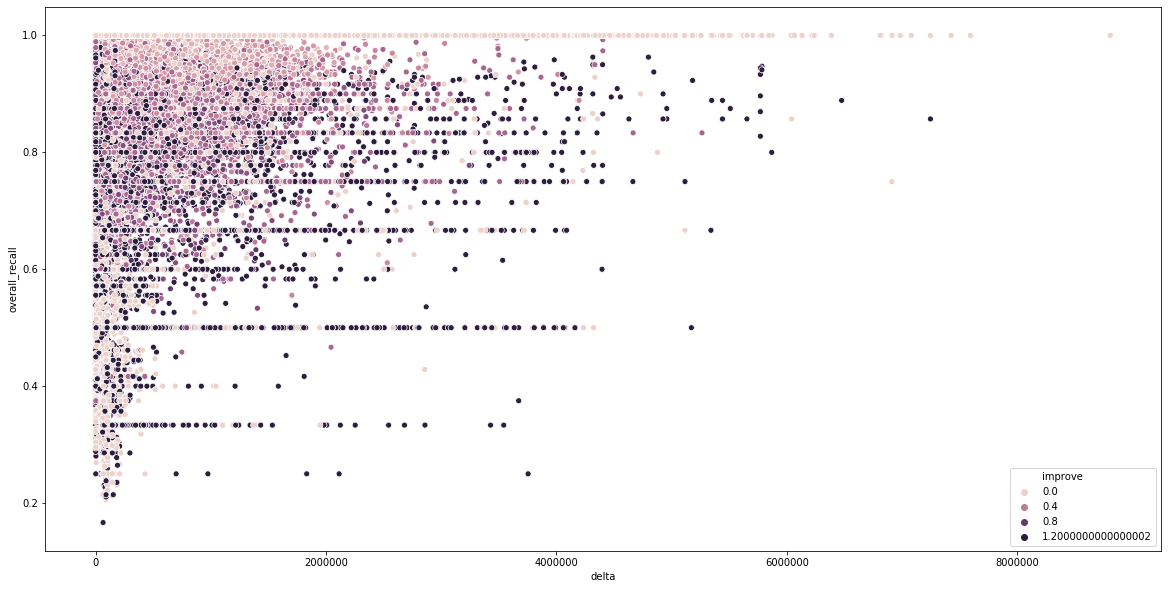

In [440]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = it_learn_eng_means.delta, 
                y = it_learn_eng_means.overall_recall, 
                hue = it_learn_eng_means.improve)

In [486]:
features = [col for col in it_learn_eng_means.columns if col != 'overall_recall' and it_learn_eng_means[col].dtype in [np.float64, np.int64]]
X = it_learn_eng_means[features]
y = it_learn_eng_means.overall_recall


In [469]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [514]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Training r^2:', linreg.score(X_train, y_train))
print('Testing r^2:', linreg.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test)))

Training r^2: 0.473471449493405
Testing r^2: 0.4645436536933741
Training MSE: 0.009855250804357663
Testing MSE: 0.009610360336489258


In [515]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y)

In [516]:
linreg.fit(X_train, y_train)

print('Training r^2:', linreg.score(X_train, y_train))
print('Testing r^2:', linreg.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test)))

Training r^2: 0.4712411433297864
Testing r^2: 0.47006410699206563
Training MSE: 0.009780291357316246
Testing MSE: 0.00978223887034645


In [517]:
y= np.log((1-y)+0.00001)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y)
linreg.fit(X_train, y_train)

print('Training r^2:', linreg.score(X_train, y_train))
print('Testing r^2:', linreg.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test)))

Training r^2: 0.6934728047622325
Testing r^2: 0.697220808961744
Training MSE: 6.6128429170030785
Testing MSE: 6.520986113032858


In [518]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso() 
lasso.fit(X_train, y_train)
print('Training r^2:', lasso.score(X_train, y_train))
print('Testing r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(X_test)))

Training r^2: 0.6184694927649351
Testing r^2: 0.620826936660777
Training MSE: 8.230921600391591
Testing MSE: 8.166288680515013


In [506]:
lasso = Lasso(2)
lasso.fit(X_train, y_train)
print('Training r^2:', lasso.score(X_train, y_train))
print('Testing r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(X_test)))

Training r^2: 0.45877293633069993
Testing r^2: 0.46466584585369225
Training MSE: 11.686370433455922
Testing MSE: 11.497528797261564


In [501]:
ridge = Ridge() 
ridge.fit(X_train, y_train)
print('Training r^2:', ridge.score(X_train, y_train))
print('Testing r^2:', ridge.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ridge.predict(X_test)))

Training r^2: 0.6923998690856576
Testing r^2: 0.7003518902764903
Training MSE: 6.641813236155885
Testing MSE: 6.435630426168297


In [508]:
import statsmodels.api as sm

In [520]:
features = [col for col in it_learn_eng_means.columns if col != 'overall_recall' and it_learn_eng_means[col].dtype in [np.float64, np.int64]]
X = it_learn_eng_means[features]
y = it_learn_eng_means.overall_recall
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         overall_recall   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          2.200e+05
Date:                Tue, 01 Oct 2019   Prob (F-statistic):                        0.00
Time:                        14:52:23   Log-Likelihood:                          16814.
No. Observations:               70140   AIC:                                 -3.361e+04
Df Residuals:                   70133   BIC:                                 -3.355e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
session_comp     0.0012    1.6e-05     72.865      0.000       0.001       0.001
p_recall         1.0610      0.007    152.542      0.000       1.047       1.075
delta         4.601e-08   9.94e-10     46.313      0.000    4.41e-08     4.8e-08
history_seen     0.0011   2.73e-05     41.528      0.000       0.001       0.001
session_seen     0.0577      0.001     67.921      0.000       0.056       0.059
improve         -0.4530      0.006    -70.252      0.000      -0.466      -0.440
same            -0.2011      0.006    -31.063      0.000      -0.214      -0.188
==============================================================================
Omnibus:                    26156.758   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159967.008
Skew:                           1.675   Prob(JB):                         0.00
Kurtosis:                       9.597   Cond. No.                     1.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [529]:
len(list(it_learn_eng.lexeme_string)[0].split('/')[0])

5

In [531]:
word_len = [len(word.split('/')[0]) for word in list(it_learn_eng.lexeme_string)]

In [532]:
it_learn_eng['word_len'] = word_len
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  ...  course_num  overall_recall  \
136            36               36  ...           5        1.000000   
137            76               67  ...           5        0.881579   
138            61               54  ...           5        0.885246   
139            42               39  ...           5        0.928571   
140            28               22  ...           5        0.785714   

     session-overall  session_id  session_comp  improvement  improve same  \
136         0.000000           0             0         same        0    1   
137         0.118421           0             0      improve        1    0   
138         0.114754           0             0      improve        1    0   
139        -0.178571           0             0       worsen        0    0   
140         0.214286           0             0      improve        1    0   

     worsen  word_len  
136       0         5  
137       0         2  
138       0         4  
139       1         9  
140       0         5  

[5 rows x 22 columns]

In [534]:
it_learn_eng.drop(columns=['improve', 'same', 'worsen'], inplace = True)

In [535]:
it_learn_eng.drop(columns=['improvement'], inplace = True)

In [536]:
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  session_seen  session_correct  course_num  \
136            36               36             3                3           5   
137            76               67             4                4           5   
138            61               54             6                6           5   
139            42               39             4                3           5   
140            28               22             2                2           5   

     overall_recall  session-overall  session_id  session_comp  word_len  
136        1.000000         0.000000           0             0         5  
137        0.881579         0.118421           0             0         2  
138        0.885246         0.114754           0             0         4  
139        0.928571        -0.178571           0             0         9  
140        0.785714         0.214286           0             0         5

In [538]:
noun = [1 if "<n>" in word else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['noun'] = noun
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  session_seen  session_correct  course_num  \
136            36               36             3                3           5   
137            76               67             4                4           5   
138            61               54             6                6           5   
139            42               39             4                3           5   
140            28               22             2                2           5   

     overall_recall  session-overall  session_id  session_comp  word_len  noun  
136        1.000000         0.000000           0             0         5     1  
137        0.881579         0.118421           0             0         2     0  
138        0.885246         0.114754           0             0         4     0  
139        0.928571        -0.178571           0             0         9     1  
140        0.785714         0.214286           0             0         5     1

In [539]:
plural = [1 if "<pl>" in word else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['plural'] = plural
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  session_seen  session_correct  course_num  \
136            36               36             3                3           5   
137            76               67             4                4           5   
138            61               54             6                6           5   
139            42               39             4                3           5   
140            28               22             2                2           5   

     overall_recall  session-overall  session_id  session_comp  word_len  \
136        1.000000         0.000000           0             0         5   
137        0.881579         0.118421           0             0         2   
138        0.885246         0.114754           0             0         4   
139        0.928571        -0.178571           0             0         9   
140        0.785714         0.214286           0             0         5   

     noun  plural  
136     1       1  
137     0       1  
138     0       0  
139     1       0  
140     1       1

In [545]:
verb = [1 if "<v" in word else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['verb'] = verb
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  ...  session_correct  course_num  \
136            36               36  ...                3           5   
137            76               67  ...                4           5   
138            61               54  ...                6           5   
139            42               39  ...                3           5   
140            28               22  ...                2           5   

     overall_recall  session-overall  session_id  session_comp  word_len  \
136        1.000000         0.000000           0             0         5   
137        0.881579         0.118421           0             0         2   
138        0.885246         0.114754           0             0         4   
139        0.928571        -0.178571           0             0         9   
140        0.785714         0.214286           0             0         5   

     noun  plural  verb  
136     1       1     0  
137     0       1     0  
138     0       0     1  
139     1       0     0  
140     1       1     0  

[5 rows x 21 columns]

In [549]:
words = [word.split('/')[0] for word in list(it_learn_eng.lexeme_string)]
"past" in words

False

In [551]:
past = [1 if "past" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['past'] = past
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  ...  course_num  overall_recall  \
136            36               36  ...           5        1.000000   
137            76               67  ...           5        0.881579   
138            61               54  ...           5        0.885246   
139            42               39  ...           5        0.928571   
140            28               22  ...           5        0.785714   

     session-overall  session_id  session_comp  word_len  noun  plural  verb  \
136         0.000000           0             0         5     1       1     0   
137         0.118421           0             0         2     0       1     0   
138         0.114754           0             0         4     0       0     1   
139        -0.178571           0             0         9     1       0     0   
140         0.214286           0             0         5     1       1     0   

     past  
136     0  
137     0  
138     0  
139     0  
140     0  

[5 rows x 22 columns]

In [572]:
adj = [1 if "<adj>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['adj'] = adj
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  ...  session_comp  word_len  noun  plural  \
136            36               36  ...             0         5     1       1   
137            76               67  ...             0         2     0       1   
138            61               54  ...             0         4     0       0   
139            42               39  ...             0         9     1       0   
140            28               22  ...             0         5     1       1   

     verb  past  adj  adv  determiner  preposition  
136     0     0    0    0           0            0  
137     0     0    0    0           0            0  
138     1     0    0    0           0            0  
139     0     0    0    0           0            0  
140     0     0    0    0           0            0  

[5 rows x 26 columns]

In [571]:
adv = [1 if "<adv>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['adv'] = adv
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  ...  session_comp  word_len  noun  plural  \
136            36               36  ...             0         5     1       1   
137            76               67  ...             0         2     0       1   
138            61               54  ...             0         4     0       0   
139            42               39  ...             0         9     1       0   
140            28               22  ...             0         5     1       1   

     verb  past  adj  adv  determiner  preposition  
136     0     0    0    0           0            0  
137     0     0    0    0           0            0  
138     1     0    0    0           0            0  
139     0     0    0    0           0            0  
140     0     0    0    0           0            0  

[5 rows x 26 columns]

In [570]:
det = [1 if "<det>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['determiner'] = det
it_learn_eng.tail()

p_recall   timestamp  delta user_id learning_language ui_language  \
12854221  0.800000  1363104897    368  u:i5D8                en          it   
12854222  0.800000  1363104897    368  u:i5D8                en          it   
12854223  1.000000  1363104897    368  u:i5D8                en          it   
12854224  0.600000  1363104897    368  u:i5D8                en          it   
12854225  0.666667  1363104897    368  u:i5D8                en          it   

                                 lexeme_id             lexeme_string  \
12854221  d5efc552aaea3109eb5388aa1ec8673d     the/the<det><def><sp>   
12854222  a826c47947d68549fa81e19cafa57ba0      eat/eat<vblex><pres>   
12854223  5e29d77697d23070a1fb92eb6c90e9b6        bread/bread<n><sg>   
12854224  cdfecc9247566d40bb964a218c54c783  drink/drink<vblex><pres>   
12854225  c52ab45d4e22ee7580041911159e3c0c        water/water<n><sg>   

          history_seen  history_correct  ...  session_comp  word_len  noun  \
12854221             6                4  ...             7         3     0   
12854222             4                4  ...             7         3     0   
12854223             4                4  ...             7         5     1   
12854224             3                2  ...             7         5     0   
12854225             5                3  ...             7         5     1   

          plural  verb  past  adj  adv  determiner  preposition  
12854221       0     0     0    0    0           1            0  
12854222       0     1     0    0    0           0            0  
12854223       0     0     0    0    0           0            0  
12854224       0     1     0    0    0           0            0  
12854225       0     0     0    0    0           0            0  

[5 rows x 26 columns]

In [569]:
pr = [1 if "<pr>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['preposition'] = pr
it_learn_eng.tail(10)

p_recall   timestamp  delta user_id learning_language ui_language  \
12853682  1.000000  1363104857   5864  u:hBr1                en          it   
12853683  0.000000  1363104857  15954  u:hBr1                en          it   
12853684  1.000000  1363104857   5864  u:hBr1                en          it   
12854219  0.750000  1363104897    368  u:i5D8                en          it   
12854220  1.000000  1363104897    368  u:i5D8                en          it   
12854221  0.800000  1363104897    368  u:i5D8                en          it   
12854222  0.800000  1363104897    368  u:i5D8                en          it   
12854223  1.000000  1363104897    368  u:i5D8                en          it   
12854224  0.600000  1363104897    368  u:i5D8                en          it   
12854225  0.666667  1363104897    368  u:i5D8                en          it   

                                 lexeme_id                     lexeme_string  \
12853682  7db6cb705cd5fecf3fa67ee708c8854b               between/between<pr>   
12853683  e1f9d2bf9d8ffd2bfb55710f698d6dd3                         up/up<pr>   
12853684  e09b138d58a98c83f120ffbc898ce818                         at/at<pr>   
12854219  01669d9689c5cf2ec04c58a893f02ab6  drinks/drink<vblex><pri><p3><sg>   
12854220  928787744a962cd4ec55c1b22cedc913      eats/eat<vblex><pri><p3><sg>   
12854221  d5efc552aaea3109eb5388aa1ec8673d             the/the<det><def><sp>   
12854222  a826c47947d68549fa81e19cafa57ba0              eat/eat<vblex><pres>   
12854223  5e29d77697d23070a1fb92eb6c90e9b6                bread/bread<n><sg>   
12854224  cdfecc9247566d40bb964a218c54c783          drink/drink<vblex><pres>   
12854225  c52ab45d4e22ee7580041911159e3c0c                water/water<n><sg>   

          history_seen  history_correct  ...  session_comp  word_len  noun  \
12853682            20               20  ...           209         7     0   
12853683             7                7  ...           209         2     0   
12853684            27               25  ...           209         2     0   
12854219             4                3  ...             7         6     0   
12854220             5                4  ...             7         4     0   
12854221             6                4  ...             7         3     0   
12854222             4                4  ...             7         3     0   
12854223             4                4  ...             7         5     1   
12854224             3                2  ...             7         5     0   
12854225             5                3  ...             7         5     1   

          plural  verb  past  adj  adv  determiner  preposition  
12853682       0     0     0    0    0           0            1  
12853683       0     0     0    0    0           0            1  
12853684       0     0     0    0    0           0            1  
12854219       0     1     0    0    0           0            0  
12854220       0     1     0    0    0           0            0  
12854221       0     0     0    0    0           1            0  
12854222       0     1     0    0    0           0            0  
12854223       0     0     0    0    0           0            0  
12854224       0     1     0    0    0           0            0  
12854225       0     0     0    0    0           0            0  

[10 rows x 26 columns]

In [575]:
sg = [1 if "<sg>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['singular'] = sg
it_learn_eng.tail(10)

p_recall   timestamp  delta user_id learning_language ui_language  \
12853682  1.000000  1363104857   5864  u:hBr1                en          it   
12853683  0.000000  1363104857  15954  u:hBr1                en          it   
12853684  1.000000  1363104857   5864  u:hBr1                en          it   
12854219  0.750000  1363104897    368  u:i5D8                en          it   
12854220  1.000000  1363104897    368  u:i5D8                en          it   
12854221  0.800000  1363104897    368  u:i5D8                en          it   
12854222  0.800000  1363104897    368  u:i5D8                en          it   
12854223  1.000000  1363104897    368  u:i5D8                en          it   
12854224  0.600000  1363104897    368  u:i5D8                en          it   
12854225  0.666667  1363104897    368  u:i5D8                en          it   

                                 lexeme_id                     lexeme_string  \
12853682  7db6cb705cd5fecf3fa67ee708c8854b               between/between<pr>   
12853683  e1f9d2bf9d8ffd2bfb55710f698d6dd3                         up/up<pr>   
12853684  e09b138d58a98c83f120ffbc898ce818                         at/at<pr>   
12854219  01669d9689c5cf2ec04c58a893f02ab6  drinks/drink<vblex><pri><p3><sg>   
12854220  928787744a962cd4ec55c1b22cedc913      eats/eat<vblex><pri><p3><sg>   
12854221  d5efc552aaea3109eb5388aa1ec8673d             the/the<det><def><sp>   
12854222  a826c47947d68549fa81e19cafa57ba0              eat/eat<vblex><pres>   
12854223  5e29d77697d23070a1fb92eb6c90e9b6                bread/bread<n><sg>   
12854224  cdfecc9247566d40bb964a218c54c783          drink/drink<vblex><pres>   
12854225  c52ab45d4e22ee7580041911159e3c0c                water/water<n><sg>   

          history_seen  history_correct  ...  word_len  noun  plural  verb  \
12853682            20               20  ...         7     0       0     0   
12853683             7                7  ...         2     0       0     0   
12853684            27               25  ...         2     0       0     0   
12854219             4                3  ...         6     0       0     1   
12854220             5                4  ...         4     0       0     1   
12854221             6                4  ...         3     0       0     0   
12854222             4                4  ...         3     0       0     1   
12854223             4                4  ...         5     1       0     0   
12854224             3                2  ...         5     0       0     1   
12854225             5                3  ...         5     1       0     0   

          past  adj  adv  determiner  preposition  singular  
12853682     0    0    0           0            1         0  
12853683     0    0    0           0            1         0  
12853684     0    0    0           0            1         0  
12854219     0    0    0           0            0         1  
12854220     0    0    0           0            0         1  
12854221     0    0    0           1            0         0  
12854222     0    0    0           0            0         0  
12854223     0    0    0           0            0         1  
12854224     0    0    0           0            0         0  
12854225     0    0    0           0            0         1  

[10 rows x 27 columns]

In [576]:
it_learn_eng.columns

Index(['p_recall', 'timestamp', 'delta', 'user_id', 'learning_language',
       'ui_language', 'lexeme_id', 'lexeme_string', 'history_seen',
       'history_correct', 'session_seen', 'session_correct', 'course_num',
       'overall_recall', 'session-overall', 'session_id', 'session_comp',
       'word_len', 'noun', 'plural', 'verb', 'past', 'adj', 'adv',
       'determiner', 'preposition', 'singular'],
      dtype='object')

In [577]:
it_learn_eng.drop(columns=['learning_language','ui_language', 'history_correct',
                           'session_correct', 'course_num','session-overall'], inplace = True)

In [578]:
it_learn_eng.head()

p_recall   timestamp   delta user_id                         lexeme_id  \
136      1.00  1362082525  610672  u:hX-p  390ca9c2868c14c5616c460e4f31762c   
137      1.00  1362082525     271  u:hX-p  b968b069e4e2c04848e9f8924e34c031   
138      1.00  1362082525   92504  u:hX-p  efc2c65bd3a2ab7e0e2d4db65e290699   
139      0.75  1362082525    5265  u:hX-p  e16c578226476ae646530b6356f9b0ad   
140      1.00  1362082525   92504  u:hX-p  b573a2ebb834b1346202143003738756   

                        lexeme_string  history_seen  session_seen  \
136                women/woman<n><pl>            36             3   
137  we/prpers<prn><subj><p1><mf><pl>            76             4   
138            read/read<vblex><pres>            61             6   
139        newspaper/newspaper<n><sg>            42             4   
140                 girls/girl<n><pl>            28             2   

     overall_recall  session_id  ...  word_len  noun  plural  verb  past  adj  \
136        1.000000           0  ...         5     1       1     0     0    0   
137        0.881579           0  ...         2     0       1     0     0    0   
138        0.885246           0  ...         4     0       0     1     0    0   
139        0.928571           0  ...         9     1       0     0     0    0   
140        0.785714           0  ...         5     1       1     0     0    0   

     adv  determiner  preposition  singular  
136    0           0            0         0  
137    0           0            0         0  
138    0           0            0         0  
139    0           0            0         1  
140    0           0            0         0  

[5 rows x 21 columns]

In [579]:
it_learn_eng_means = it_learn_eng.groupby(['lexeme_id', 'session_comp']).mean()
it_learn_eng_means.reset_index(inplace=True)
it_learn_eng_means.head()

lexeme_id  session_comp  p_recall     timestamp  \
0  000f3063358c188d171d903ec5a7855c             0  0.800000  1.362488e+09   
1  000f3063358c188d171d903ec5a7855c             1  1.000000  1.362420e+09   
2  000f3063358c188d171d903ec5a7855c             2  1.000000  1.362503e+09   
3  000f3063358c188d171d903ec5a7855c             3  0.833333  1.362294e+09   
4  000f3063358c188d171d903ec5a7855c             4  1.000000  1.362651e+09   

       delta  history_seen  session_seen  overall_recall    session_id  \
0  1499914.9      3.700000      1.000000        0.945909  10590.400000   
1   120292.0      3.400000      1.200000        0.866667   8911.200000   
2   273500.5      4.500000      1.000000        0.928571  11346.500000   
3   530114.0      5.333333      1.333333        1.000000   4904.666667   
4    97803.0      2.750000      1.250000        0.916667  15138.500000   

   word_len  noun  plural  verb  past  adj  adv  determiner  preposition  \
0       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
1       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
2       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
3       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
4       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   

   singular  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0

In [582]:
it_learn_eng_means.drop(columns=['timestamp','session_id'], inplace = True)

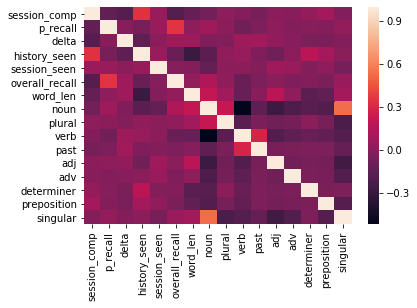

In [586]:
sns.heatmap(it_learn_eng_means.corr())

In [587]:
features = [col for col in it_learn_eng_means.columns if col != 'overall_recall' and it_learn_eng_means[col].dtype in [np.float64, np.int64]]
X = it_learn_eng_means[features]
y = it_learn_eng_means.overall_recall
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         overall_recall   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.213e+05
Date:                Tue, 01 Oct 2019   Prob (F-statistic):                        0.00
Time:                        16:40:31   Log-Likelihood:                          22436.
No. Observations:               70145   AIC:                                 -4.484e+04
Df Residuals:                   70130   BIC:                                 -4.470e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
session_comp     0.0004   1.51e-05     23.258      0.000       0.000       0.000
p_recall         0.4700      0.002    213.923      0.000       0.466       0.474
delta         2.985e-08   9.33e-10     32.000      0.000     2.8e-08    3.17e-08
history_seen     0.0005   2.49e-05     18.342      0.000       0.000       0.001
session_seen     0.0394      0.001     51.886      0.000       0.038       0.041
word_len         0.0229      0.000     66.534      0.000       0.022       0.024
noun             0.2460      0.003     96.587      0.000       0.241       0.251
plural           0.0387      0.003     12.715      0.000       0.033       0.045
verb             0.2498      0.002    102.226      0.000       0.245       0.255
past             0.0118      0.004      2.967      0.003       0.004       0.020
adj              0.2240      0.003     68.421      0.000       0.218       0.230
adv              0.2404      0.004     66.537      0.000       0.233       0.247
determiner       0.2773      0.004     69.006      0.000       0.269       0.285
preposition      0.2623      0.004     69.924      0.000       0.255       0.270
singular         0.0334      0.002     18.001      0.000       0.030       0.037
==============================================================================
Omnibus:                     3820.764   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15790.830
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                       5.324   Cond. No.                     7.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

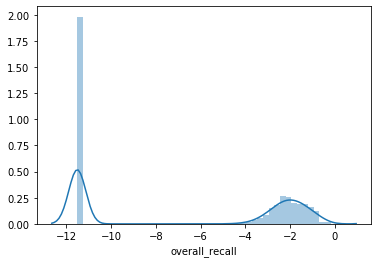

In [597]:
sns.distplot(np.log((1-it_learn_eng.overall_recall)+0.00001))

In [598]:
from scipy import stats

In [599]:
stats.zscore(it_learn_eng.overall_recall)

array([ 0.68593392, -0.23302851, -0.20457248, ...,  0.68593392,
       -1.90077514, -2.41811695])